In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Transactions dataset

In [2]:
df_transactions=pd.read_csv("transactions.csv",nrows=1000001)

In [3]:
df_transactions.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,YyO+tlZtAXYXoZhNr3Vg3+dfVQvrBVGO8j1mfqe4ZHc=,41,30,129,129,1,20150930,20151101,0
1,AZtu6Wl0gPojrEQYB8Q3vBSmE2wnZ3hi1FbK1rQQ0A4=,41,30,149,149,1,20150930,20151031,0
2,UkDFI97Qb6+s2LWcijVVv4rMAsORbVDT2wNXF0aVbns=,41,30,129,129,1,20150930,20160427,0
3,M1C56ijxozNaGD0t2h68PnH2xtx5iO5iR2MVYQB6nBI=,39,30,149,149,1,20150930,20151128,0
4,yvj6zyBUaqdbUQSrKsrZ+xNDVM62knauSZJzakS9OW4=,39,30,149,149,1,20150930,20151121,0


In [4]:
print(df_transactions.shape)

(1000001, 9)


In [5]:
len(df_transactions.columns)

9

In [6]:
df_transactions.isnull().sum()

msno                      0
payment_method_id         0
payment_plan_days         0
plan_list_price           0
actual_amount_paid        0
is_auto_renew             0
transaction_date          0
membership_expire_date    0
is_cancel                 0
dtype: int64

## Feature 1 :- discount

In [7]:
df_transactions['discount']=df_transactions['plan_list_price']-df_transactions['actual_amount_paid']
df_transactions['discount'].unique()

array([    0,   149,  -149,    30,  -119,  -150,  -129,  -536,  -894,
       -1788,  -134,    20,  -799,   120,   180,   -35,    50, -1599,
        -100,  -131,  -300,  -480,  -450,    -1, -1000,  -105,     1,
        -447], dtype=int64)

## Feature 2: is_discount

to check whether the customer has availed any discount or not.

In [8]:
df_transactions['is_discount']=df_transactions.discount.apply(lambda x:1 if x>0 else 0)
print(df_transactions['is_discount'].head())
print(df_transactions['is_discount'].unique())

0    0
1    0
2    0
3    0
4    0
Name: is_discount, dtype: int64
[0 1]


## Feature 3:- amount_per_day

In [9]:
df_transactions['amt_per_day']=df_transactions['actual_amount_paid']/df_transactions['payment_plan_days']
df_transactions['amt_per_day'].head()

0    4.300000
1    4.966667
2    4.300000
3    4.966667
4    4.966667
Name: amt_per_day, dtype: float64

Converting date columns from integer to datetime

In [10]:
df_transactions["transaction_date"]=pd.to_datetime(df_transactions["transaction_date"],format='%Y%m%d')
df_transactions["membership_expire_date"]=pd.to_datetime(df_transactions["membership_expire_date"],format='%Y%m%d')
df_transactions.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,discount,is_discount,amt_per_day
0,YyO+tlZtAXYXoZhNr3Vg3+dfVQvrBVGO8j1mfqe4ZHc=,41,30,129,129,1,2015-09-30,2015-11-01,0,0,0,4.300000
1,AZtu6Wl0gPojrEQYB8Q3vBSmE2wnZ3hi1FbK1rQQ0A4=,41,30,149,149,1,2015-09-30,2015-10-31,0,0,0,4.966667
2,UkDFI97Qb6+s2LWcijVVv4rMAsORbVDT2wNXF0aVbns=,41,30,129,129,1,2015-09-30,2016-04-27,0,0,0,4.300000
3,M1C56ijxozNaGD0t2h68PnH2xtx5iO5iR2MVYQB6nBI=,39,30,149,149,1,2015-09-30,2015-11-28,0,0,0,4.966667
4,yvj6zyBUaqdbUQSrKsrZ+xNDVM62knauSZJzakS9OW4=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,0,4.966667


In [11]:
df_transactions.tail(10)

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,discount,is_discount,amt_per_day
999991,fQMh6XpwVoRezAPo4PwzfyxgJB5mH5uAKR2/zihwoGE=,41,30,149,149,1,2016-03-13,2016-04-13,0,0,0,4.966667
999992,Gv+CPRpyqPnWogcc2etNBv26yqF8UdRgs8VNQJnpuGw=,41,30,129,129,1,2016-03-13,2016-04-13,0,0,0,4.300000
999993,5NntBqtHgcw84T1kz0pwQIV3VoMQL25FpKEdbYqAjFA=,41,30,129,129,1,2016-03-13,2016-04-13,0,0,0,4.300000
999994,DDe5WKI4TEJzU2twFgR9UD8CGQGJZmpx117bqfHVHc8=,41,30,99,99,1,2016-03-13,2016-04-13,0,0,0,3.300000
999995,8ASEIGuv0ySHCcVq915ulSc8DdTP40lXAtjx3RB7x+U=,41,30,149,149,1,2016-03-14,2016-03-14,1,0,0,4.966667
999996,QXi3f7LVrPjqBlkTqccvFzAkXbGsWY/E2GmNrWPGH/s=,41,30,149,0,1,2016-03-14,2016-04-13,0,149,1,0.000000
999997,DDc4hpbljAOA4lOg/rrYX+La2u7RTKkQZS3gUUWm4T4=,41,30,129,129,1,2016-02-13,2016-03-14,0,0,0,4.300000
999998,uSpeXT1LUVq5iy7nfTPhwAbsjRneSbvDnuC6wCXxeEU=,41,30,149,149,1,2016-02-13,2016-03-13,0,0,0,4.966667
999999,MY3fQdKFh1Feqp8A0vXPejA80QaQoxCK+FjdWwvdXNE=,41,30,149,149,1,2016-02-13,2016-03-13,0,0,0,4.966667
1000000,0IRqsjLl520fBwtla3Oh9IeT7fJ84SFdJhjs7r3P4RE=,41,30,99,99,1,2016-02-13,2016-03-13,0,0,0,3.300000


## Feature 4:- membership_duration_d

this gives the membership duration i.e is the difference between  transaction_date and membership_expire_date in terms of days

In [12]:
df_transactions['membership_duration_d']=df_transactions.membership_expire_date-df_transactions.transaction_date
df_transactions['membership_duration_d']=df_transactions['membership_duration_d']/np.timedelta64(1,'D')
df_transactions['membership_duration_d']=df_transactions['membership_duration_d'].astype(int)

In [13]:
df_transactions.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,discount,is_discount,amt_per_day,membership_duration_d
0,YyO+tlZtAXYXoZhNr3Vg3+dfVQvrBVGO8j1mfqe4ZHc=,41,30,129,129,1,2015-09-30,2015-11-01,0,0,0,4.300000,32
1,AZtu6Wl0gPojrEQYB8Q3vBSmE2wnZ3hi1FbK1rQQ0A4=,41,30,149,149,1,2015-09-30,2015-10-31,0,0,0,4.966667,31
2,UkDFI97Qb6+s2LWcijVVv4rMAsORbVDT2wNXF0aVbns=,41,30,129,129,1,2015-09-30,2016-04-27,0,0,0,4.300000,210
3,M1C56ijxozNaGD0t2h68PnH2xtx5iO5iR2MVYQB6nBI=,39,30,149,149,1,2015-09-30,2015-11-28,0,0,0,4.966667,59
4,yvj6zyBUaqdbUQSrKsrZ+xNDVM62knauSZJzakS9OW4=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,0,4.966667,52


## Feature 5:- membership_duration_m

this gives the membership duration i.e is the difference between transaction_date and membership_expire_date in terms of months


In [14]:
df_transactions['membership_duration_m']=(df_transactions.membership_expire_date-df_transactions.transaction_date)/np.timedelta64(1,'M')
df_transactions['membership_duration_m']=round(df_transactions['membership_duration_m']).astype(int)
df_transactions['membership_duration_m'].head()

0    1
1    1
2    7
3    2
4    2
Name: membership_duration_m, dtype: int32

In [15]:
df_transactions.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,discount,is_discount,amt_per_day,membership_duration_d,membership_duration_m
0,YyO+tlZtAXYXoZhNr3Vg3+dfVQvrBVGO8j1mfqe4ZHc=,41,30,129,129,1,2015-09-30,2015-11-01,0,0,0,4.300000,32,1
1,AZtu6Wl0gPojrEQYB8Q3vBSmE2wnZ3hi1FbK1rQQ0A4=,41,30,149,149,1,2015-09-30,2015-10-31,0,0,0,4.966667,31,1
2,UkDFI97Qb6+s2LWcijVVv4rMAsORbVDT2wNXF0aVbns=,41,30,129,129,1,2015-09-30,2016-04-27,0,0,0,4.300000,210,7
3,M1C56ijxozNaGD0t2h68PnH2xtx5iO5iR2MVYQB6nBI=,39,30,149,149,1,2015-09-30,2015-11-28,0,0,0,4.966667,59,2
4,yvj6zyBUaqdbUQSrKsrZ+xNDVM62knauSZJzakS9OW4=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,0,4.966667,52,2


In [16]:
len(df_transactions.columns)

14

# Members Dataset

In [17]:
df_members=pd.read_csv("members_v3.csv",nrows=1000001)

In [18]:
df_members.head()

,msno,city,bd,gender,registered_via,registration_init_time
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,0,NaN,11,20110911
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,NaN,7,20110914
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,0,NaN,11,20110915
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,0,NaN,11,20110915
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32,female,9,20110915


In [19]:
df_members.shape

(1000001, 6)

In [20]:
len(df_members.columns)

6

In [21]:
date_cols = ['registration_init_time']

for col in date_cols:
    df_members[col] = pd.to_datetime(df_members[col], format='%Y%m%d')

In [22]:
df_members.head()

,msno,city,bd,gender,registered_via,registration_init_time
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,0,NaN,11,2011-09-11
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,NaN,7,2011-09-14
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,0,NaN,11,2011-09-15
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,0,NaN,11,2011-09-15
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32,female,9,2011-09-15


In [23]:
df_members.isnull().sum()

msno                           0
city                           0
bd                             0
gender                    607945
registered_via                 0
registration_init_time         0
dtype: int64

In [24]:
df_members.dropna(subset=['gender'],inplace=True)

In [25]:
df_members.head()

,msno,city,bd,gender,registered_via,registration_init_time
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32,female,9,2011-09-15
5,yLkV2gbZ4GLFwqTOXLVHz0VGrMYcgBGgKZ3kj9RiYu8=,4,30,male,9,2011-09-16
7,WH5Jq4mgtfUFXh2yz+HrcTXKS4Oess4k4W3qKolAeb0=,5,34,male,9,2011-09-16
8,tKmbR4X5VXjHmxERrckawEMZ4znVy1lAQIR1vV5rdNk=,5,19,male,9,2011-09-17
9,I0yFvqMoNkM8ZNHb617e1RBzIS/YRKemHO7Wj13EtA0=,13,63,male,9,2011-09-18


In [26]:
df_members.shape

(392056, 6)

In [27]:
df_members.isnull().sum()

msno                      0
city                      0
bd                        0
gender                    0
registered_via            0
registration_init_time    0
dtype: int64

In [28]:
df_members=df_members[df_members.bd>10]
df_members=df_members[df_members.bd<50]
df_members

,msno,city,bd,gender,registered_via,registration_init_time
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32,female,9,2011-09-15
5,yLkV2gbZ4GLFwqTOXLVHz0VGrMYcgBGgKZ3kj9RiYu8=,4,30,male,9,2011-09-16
7,WH5Jq4mgtfUFXh2yz+HrcTXKS4Oess4k4W3qKolAeb0=,5,34,male,9,2011-09-16
8,tKmbR4X5VXjHmxERrckawEMZ4znVy1lAQIR1vV5rdNk=,5,19,male,9,2011-09-17
11,dCvvBHlaOAqgkAcv36IZ9twaCyH0Z9om0wEiKn13B3o=,22,18,male,9,2011-09-19
...,...,...,...,...,...,...
999952,pqUuHjMtHXhqoQfSQ+/+yT+jSphOkcjXhIaOTUFxdJU=,21,17,female,4,2016-01-16
999963,CnnwowkjfP+lOW9oCfcrRbZJ6x0sm+KaGF56ZQMNcr4=,1,19,male,3,2016-01-16
999981,v0GiM9/Y4sedqDqlR69QM1ATuLhhwtGeGzKV9VwN83w=,5,20,female,3,2016-01-17
999992,3Pd3GgNY8oTYdUve225IaNmgwR/2MyQJYGQ/Z1nRYvc=,22,24,male,7,2016-01-17


# Merging dataframes (transactions and members)

In [29]:
df_comb=pd.merge(df_transactions,df_members,on='msno',how='inner')

In [30]:
df_comb.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,discount,is_discount,amt_per_day,membership_duration_d,membership_duration_m,city,bd,gender,registered_via,registration_init_time
0,yvj6zyBUaqdbUQSrKsrZ+xNDVM62knauSZJzakS9OW4=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,0,4.966667,52,2,12,30,female,9,2009-09-18
1,yvj6zyBUaqdbUQSrKsrZ+xNDVM62knauSZJzakS9OW4=,39,0,0,149,1,2015-04-30,2015-06-21,0,-149,0,inf,52,2,12,30,female,9,2009-09-18
2,KN7I82kjY0Tn76Ny95ncqBUVbO7b8AXrOPqZutKpxIM=,21,30,149,149,1,2015-09-30,2015-11-07,0,0,0,4.966667,38,1,22,40,male,9,2009-12-02
3,KN7I82kjY0Tn76Ny95ncqBUVbO7b8AXrOPqZutKpxIM=,21,30,149,149,1,2016-08-31,2016-10-07,0,0,0,4.966667,37,1,22,40,male,9,2009-12-02
4,KN7I82kjY0Tn76Ny95ncqBUVbO7b8AXrOPqZutKpxIM=,21,31,149,149,1,2015-02-28,2015-04-07,0,0,0,4.806452,38,1,22,40,male,9,2009-12-02


In [31]:
df_comb.shape

(85965, 19)

In [32]:
df_comb.isnull().sum()

msno                       0
payment_method_id          0
payment_plan_days          0
plan_list_price            0
actual_amount_paid         0
is_auto_renew              0
transaction_date           0
membership_expire_date     0
is_cancel                  0
discount                   0
is_discount                0
amt_per_day               18
membership_duration_d      0
membership_duration_m      0
city                       0
bd                         0
gender                     0
registered_via             0
registration_init_time     0
dtype: int64

In [33]:
df_comb.dropna(subset=['amt_per_day'],inplace=True)
df_comb["amt_per_day"].fillna(method="bfill",inplace=True)

In [34]:
df_comb.isnull().sum()

msno                      0
payment_method_id         0
payment_plan_days         0
plan_list_price           0
actual_amount_paid        0
is_auto_renew             0
transaction_date          0
membership_expire_date    0
is_cancel                 0
discount                  0
is_discount               0
amt_per_day               0
membership_duration_d     0
membership_duration_m     0
city                      0
bd                        0
gender                    0
registered_via            0
registration_init_time    0
dtype: int64

In [35]:
df_comb.shape

(85947, 19)

## Feature 6:- registration_duration_d

In [36]:
# Registration duration in terms of days
df_comb['registration_duration_d']=df_comb.membership_expire_date-df_comb.registration_init_time
df_comb['registration_duration_d'] = df_comb['registration_duration_d'] / np.timedelta64(1, 'D')
df_comb['registration_duration_d'] = df_comb['registration_duration_d'].astype(int)

In [37]:
df_comb.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,discount,is_discount,amt_per_day,membership_duration_d,membership_duration_m,city,bd,gender,registered_via,registration_init_time,registration_duration_d
0,yvj6zyBUaqdbUQSrKsrZ+xNDVM62knauSZJzakS9OW4=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,0,4.966667,52,2,12,30,female,9,2009-09-18,2255
1,yvj6zyBUaqdbUQSrKsrZ+xNDVM62knauSZJzakS9OW4=,39,0,0,149,1,2015-04-30,2015-06-21,0,-149,0,inf,52,2,12,30,female,9,2009-09-18,2102
2,KN7I82kjY0Tn76Ny95ncqBUVbO7b8AXrOPqZutKpxIM=,21,30,149,149,1,2015-09-30,2015-11-07,0,0,0,4.966667,38,1,22,40,male,9,2009-12-02,2166
3,KN7I82kjY0Tn76Ny95ncqBUVbO7b8AXrOPqZutKpxIM=,21,30,149,149,1,2016-08-31,2016-10-07,0,0,0,4.966667,37,1,22,40,male,9,2009-12-02,2501
4,KN7I82kjY0Tn76Ny95ncqBUVbO7b8AXrOPqZutKpxIM=,21,31,149,149,1,2015-02-28,2015-04-07,0,0,0,4.806452,38,1,22,40,male,9,2009-12-02,1952


## Feature 7:- registration_duration_m

In [38]:
# Registration duration in terms of months
df_comb['registration_duration_m']=df_comb.membership_expire_date-df_comb.registration_init_time
df_comb['registration_duration_m'] = df_comb['registration_duration_m'] / np.timedelta64(1, 'M')
df_comb['registration_duration_m'] = df_comb['registration_duration_m'].astype(int)

In [39]:
df_comb.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,discount,...,amt_per_day,membership_duration_d,membership_duration_m,city,bd,gender,registered_via,registration_init_time,registration_duration_d,registration_duration_m
0,yvj6zyBUaqdbUQSrKsrZ+xNDVM62knauSZJzakS9OW4=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,4.966667,52,2,12,30,female,9,2009-09-18,2255,74
1,yvj6zyBUaqdbUQSrKsrZ+xNDVM62knauSZJzakS9OW4=,39,0,0,149,1,2015-04-30,2015-06-21,0,-149,...,inf,52,2,12,30,female,9,2009-09-18,2102,69
2,KN7I82kjY0Tn76Ny95ncqBUVbO7b8AXrOPqZutKpxIM=,21,30,149,149,1,2015-09-30,2015-11-07,0,0,...,4.966667,38,1,22,40,male,9,2009-12-02,2166,71
3,KN7I82kjY0Tn76Ny95ncqBUVbO7b8AXrOPqZutKpxIM=,21,30,149,149,1,2016-08-31,2016-10-07,0,0,...,4.966667,37,1,22,40,male,9,2009-12-02,2501,82
4,KN7I82kjY0Tn76Ny95ncqBUVbO7b8AXrOPqZutKpxIM=,21,31,149,149,1,2015-02-28,2015-04-07,0,0,...,4.806452,38,1,22,40,male,9,2009-12-02,1952,64


In [40]:
df_comb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85947 entries, 0 to 85964
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   msno                     85947 non-null  object        
 1   payment_method_id        85947 non-null  int64         
 2   payment_plan_days        85947 non-null  int64         
 3   plan_list_price          85947 non-null  int64         
 4   actual_amount_paid       85947 non-null  int64         
 5   is_auto_renew            85947 non-null  int64         
 6   transaction_date         85947 non-null  datetime64[ns]
 7   membership_expire_date   85947 non-null  datetime64[ns]
 8   is_cancel                85947 non-null  int64         
 9   discount                 85947 non-null  int64         
 10  is_discount              85947 non-null  int64         
 11  amt_per_day              85947 non-null  float64       
 12  membership_duration_d    85947 n

In [41]:
df_comb['is_auto_renew'] = df_comb['is_auto_renew'].astype("category")
df_comb['is_cancel'] = df_comb['is_cancel'].astype("category")
df_comb['is_discount'] = df_comb['is_discount'].astype("category")
df_comb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85947 entries, 0 to 85964
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   msno                     85947 non-null  object        
 1   payment_method_id        85947 non-null  int64         
 2   payment_plan_days        85947 non-null  int64         
 3   plan_list_price          85947 non-null  int64         
 4   actual_amount_paid       85947 non-null  int64         
 5   is_auto_renew            85947 non-null  category      
 6   transaction_date         85947 non-null  datetime64[ns]
 7   membership_expire_date   85947 non-null  datetime64[ns]
 8   is_cancel                85947 non-null  category      
 9   discount                 85947 non-null  int64         
 10  is_discount              85947 non-null  category      
 11  amt_per_day              85947 non-null  float64       
 12  membership_duration_d    85947 n

In [42]:
df_comb.describe()

,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,discount,amt_per_day,membership_duration_d,membership_duration_m,city,bd,registered_via,registration_duration_d,registration_duration_m
count,85947.000000,85947.000000,85947.000000,85947.000000,85947.000000,8.594700e+04,85947.000000,85947.000000,85947.000000,85947.000000,85947.000000,85947.000000,85947.000000
mean,37.401852,32.971738,156.055267,166.557274,-10.502007,inf,37.826079,1.236157,11.037034,29.851280,7.482832,1865.116362,60.806404
std,3.846593,40.379769,169.217240,166.896139,52.643615,NaN,201.111302,6.611600,5.763105,7.158043,2.314139,1157.205103,38.015561
min,2.000000,0.000000,0.000000,0.000000,-1788.000000,0.000000e+00,-17198.000000,-565.000000,1.000000,11.000000,3.000000,-17198.000000,-565.000000
25%,36.000000,30.000000,149.000000,149.000000,0.000000,4.966667e+00,30.000000,1.000000,5.000000,25.000000,7.000000,920.000000,30.000000
50%,39.000000,30.000000,149.000000,149.000000,0.000000,4.966667e+00,31.000000,1.000000,13.000000,29.000000,9.000000,1728.000000,56.000000
75%,40.000000,30.000000,149.000000,149.000000,0.000000,4.966667e+00,33.000000,1.000000,14.000000,34.000000,9.000000,2781.000000,91.000000
max,41.000000,450.000000,1788.000000,1788.000000,180.000000,inf,758.000000,25.000000,22.000000,49.000000,13.000000,4753.000000,156.000000


## Feature 8:- reg_mem_duration_d

After merging both the dataframes, we observe that the average registration_duration is much longer than that of membership_duration.


So it is highly likely that customers renew their membership on a monthly or quarterly basis.

We can create another column stating the difference between the registration and membership duration.

In [43]:
# registration membership duration in terms of days
df_comb['reg_mem_duration_d'] = df_comb['registration_duration_d'] - df_comb['membership_duration_d']

## Feature 9:- reg_mem_duration_m

In [44]:
## registration membership duration in terms of months
df_comb['reg_mem_duration_m'] = df_comb['registration_duration_m'] - df_comb['membership_duration_m']

In [45]:
df_comb.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,discount,...,membership_duration_m,city,bd,gender,registered_via,registration_init_time,registration_duration_d,registration_duration_m,reg_mem_duration_d,reg_mem_duration_m
0,yvj6zyBUaqdbUQSrKsrZ+xNDVM62knauSZJzakS9OW4=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,2,12,30,female,9,2009-09-18,2255,74,2203,72
1,yvj6zyBUaqdbUQSrKsrZ+xNDVM62knauSZJzakS9OW4=,39,0,0,149,1,2015-04-30,2015-06-21,0,-149,...,2,12,30,female,9,2009-09-18,2102,69,2050,67
2,KN7I82kjY0Tn76Ny95ncqBUVbO7b8AXrOPqZutKpxIM=,21,30,149,149,1,2015-09-30,2015-11-07,0,0,...,1,22,40,male,9,2009-12-02,2166,71,2128,70
3,KN7I82kjY0Tn76Ny95ncqBUVbO7b8AXrOPqZutKpxIM=,21,30,149,149,1,2016-08-31,2016-10-07,0,0,...,1,22,40,male,9,2009-12-02,2501,82,2464,81
4,KN7I82kjY0Tn76Ny95ncqBUVbO7b8AXrOPqZutKpxIM=,21,31,149,149,1,2015-02-28,2015-04-07,0,0,...,1,22,40,male,9,2009-12-02,1952,64,1914,63


In [46]:
len(df_comb.columns)

23

## Feature 10:- notAutorenew_&_cancel

Binary feature to predict possible churning if auto_renew = 0 and is_cancel = 1

In [47]:
df_comb['notAutorenew_&_cancel']=((df_comb.is_auto_renew==0)==(df_comb.is_cancel==1)).astype(np.int8)
df_comb.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,discount,...,city,bd,gender,registered_via,registration_init_time,registration_duration_d,registration_duration_m,reg_mem_duration_d,reg_mem_duration_m,notAutorenew_&_cancel
0,yvj6zyBUaqdbUQSrKsrZ+xNDVM62knauSZJzakS9OW4=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,12,30,female,9,2009-09-18,2255,74,2203,72,1
1,yvj6zyBUaqdbUQSrKsrZ+xNDVM62knauSZJzakS9OW4=,39,0,0,149,1,2015-04-30,2015-06-21,0,-149,...,12,30,female,9,2009-09-18,2102,69,2050,67,1
2,KN7I82kjY0Tn76Ny95ncqBUVbO7b8AXrOPqZutKpxIM=,21,30,149,149,1,2015-09-30,2015-11-07,0,0,...,22,40,male,9,2009-12-02,2166,71,2128,70,1
3,KN7I82kjY0Tn76Ny95ncqBUVbO7b8AXrOPqZutKpxIM=,21,30,149,149,1,2016-08-31,2016-10-07,0,0,...,22,40,male,9,2009-12-02,2501,82,2464,81,1
4,KN7I82kjY0Tn76Ny95ncqBUVbO7b8AXrOPqZutKpxIM=,21,31,149,149,1,2015-02-28,2015-04-07,0,0,...,22,40,male,9,2009-12-02,1952,64,1914,63,1


In [48]:
len(df_comb.columns)

24

# User_logs Dataset

In [49]:
df_user_log=pd.read_csv("user_logs.csv",nrows=1000001)

In [50]:
df_user_log.head()

,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,rxIP2f2aN0rYNp+toI0Obt/N/FYQX8hcO1fTmmy2h34=,20150513,0,0,0,0,1,1,280.335
1,rxIP2f2aN0rYNp+toI0Obt/N/FYQX8hcO1fTmmy2h34=,20150709,9,1,0,0,7,11,1658.948
2,yxiEWwE9VR5utpUecLxVdQ5B7NysUPfrNtGINaM2zA8=,20150105,3,3,0,0,68,36,17364.956
3,yxiEWwE9VR5utpUecLxVdQ5B7NysUPfrNtGINaM2zA8=,20150306,1,0,1,1,97,27,24667.317
4,yxiEWwE9VR5utpUecLxVdQ5B7NysUPfrNtGINaM2zA8=,20150501,3,0,0,0,38,38,9649.029


In [51]:
df_user_log.tail()

,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
999996,Dg3WlnWHxkJ5EeVuce7yyEY0AbKANn7kLimi4PiDhns=,20150331,7,0,1,1,16,20,4585.325
999997,Dg3WlnWHxkJ5EeVuce7yyEY0AbKANn7kLimi4PiDhns=,20150616,9,8,1,3,1,21,2764.776
999998,Dg3WlnWHxkJ5EeVuce7yyEY0AbKANn7kLimi4PiDhns=,20151003,13,1,1,1,20,15,5504.150
999999,Dg3WlnWHxkJ5EeVuce7yyEY0AbKANn7kLimi4PiDhns=,20160117,0,2,1,0,12,14,3401.370
1000000,Dg3WlnWHxkJ5EeVuce7yyEY0AbKANn7kLimi4PiDhns=,20160506,14,0,1,4,17,32,5164.286


In [52]:
df_user_log["date"]=pd.to_datetime(df_user_log["date"],format='%Y%m%d')

In [53]:
df_user_log.head()

,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,rxIP2f2aN0rYNp+toI0Obt/N/FYQX8hcO1fTmmy2h34=,2015-05-13,0,0,0,0,1,1,280.335
1,rxIP2f2aN0rYNp+toI0Obt/N/FYQX8hcO1fTmmy2h34=,2015-07-09,9,1,0,0,7,11,1658.948
2,yxiEWwE9VR5utpUecLxVdQ5B7NysUPfrNtGINaM2zA8=,2015-01-05,3,3,0,0,68,36,17364.956
3,yxiEWwE9VR5utpUecLxVdQ5B7NysUPfrNtGINaM2zA8=,2015-03-06,1,0,1,1,97,27,24667.317
4,yxiEWwE9VR5utpUecLxVdQ5B7NysUPfrNtGINaM2zA8=,2015-05-01,3,0,0,0,38,38,9649.029


# Feature 11:-total_hours

In [54]:
df_user_log['total_hours']=df_user_log['total_secs']/(3600)

In [55]:
df_user_log.head()

,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,total_hours
0,rxIP2f2aN0rYNp+toI0Obt/N/FYQX8hcO1fTmmy2h34=,2015-05-13,0,0,0,0,1,1,280.335,0.077871
1,rxIP2f2aN0rYNp+toI0Obt/N/FYQX8hcO1fTmmy2h34=,2015-07-09,9,1,0,0,7,11,1658.948,0.460819
2,yxiEWwE9VR5utpUecLxVdQ5B7NysUPfrNtGINaM2zA8=,2015-01-05,3,3,0,0,68,36,17364.956,4.823599
3,yxiEWwE9VR5utpUecLxVdQ5B7NysUPfrNtGINaM2zA8=,2015-03-06,1,0,1,1,97,27,24667.317,6.852032
4,yxiEWwE9VR5utpUecLxVdQ5B7NysUPfrNtGINaM2zA8=,2015-05-01,3,0,0,0,38,38,9649.029,2.680286


## Feature 12:- total_songs 

In [56]:
df_user_log['total_songs']=df_user_log['num_25']+df_user_log['num_50']+df_user_log['num_985']+df_user_log['num_100']

In [57]:
df_user_log.head()

,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,total_hours,total_songs
0,rxIP2f2aN0rYNp+toI0Obt/N/FYQX8hcO1fTmmy2h34=,2015-05-13,0,0,0,0,1,1,280.335,0.077871,1
1,rxIP2f2aN0rYNp+toI0Obt/N/FYQX8hcO1fTmmy2h34=,2015-07-09,9,1,0,0,7,11,1658.948,0.460819,17
2,yxiEWwE9VR5utpUecLxVdQ5B7NysUPfrNtGINaM2zA8=,2015-01-05,3,3,0,0,68,36,17364.956,4.823599,74
3,yxiEWwE9VR5utpUecLxVdQ5B7NysUPfrNtGINaM2zA8=,2015-03-06,1,0,1,1,97,27,24667.317,6.852032,99
4,yxiEWwE9VR5utpUecLxVdQ5B7NysUPfrNtGINaM2zA8=,2015-05-01,3,0,0,0,38,38,9649.029,2.680286,41


## Feature 13:- Songs_Repeated

In [58]:
df_user_log['Songs_Repeated']=df_user_log['total_songs']-df_user_log['num_unq']

In [59]:
df_user_log.head()

,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,total_hours,total_songs,Songs_Repeated
0,rxIP2f2aN0rYNp+toI0Obt/N/FYQX8hcO1fTmmy2h34=,2015-05-13,0,0,0,0,1,1,280.335,0.077871,1,0
1,rxIP2f2aN0rYNp+toI0Obt/N/FYQX8hcO1fTmmy2h34=,2015-07-09,9,1,0,0,7,11,1658.948,0.460819,17,6
2,yxiEWwE9VR5utpUecLxVdQ5B7NysUPfrNtGINaM2zA8=,2015-01-05,3,3,0,0,68,36,17364.956,4.823599,74,38
3,yxiEWwE9VR5utpUecLxVdQ5B7NysUPfrNtGINaM2zA8=,2015-03-06,1,0,1,1,97,27,24667.317,6.852032,99,72
4,yxiEWwE9VR5utpUecLxVdQ5B7NysUPfrNtGINaM2zA8=,2015-05-01,3,0,0,0,38,38,9649.029,2.680286,41,3


## Feature 14:- avg_time_spend_on_a_song_s

In [60]:
df_user_log['avg_time_spend_on_a_song_s']=df_user_log['total_secs']/df_user_log['total_songs']

In [61]:
df_user_log.head()

,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,total_hours,total_songs,Songs_Repeated,avg_time_spend_on_a_song_s
0,rxIP2f2aN0rYNp+toI0Obt/N/FYQX8hcO1fTmmy2h34=,2015-05-13,0,0,0,0,1,1,280.335,0.077871,1,0,280.335000
1,rxIP2f2aN0rYNp+toI0Obt/N/FYQX8hcO1fTmmy2h34=,2015-07-09,9,1,0,0,7,11,1658.948,0.460819,17,6,97.585176
2,yxiEWwE9VR5utpUecLxVdQ5B7NysUPfrNtGINaM2zA8=,2015-01-05,3,3,0,0,68,36,17364.956,4.823599,74,38,234.661568
3,yxiEWwE9VR5utpUecLxVdQ5B7NysUPfrNtGINaM2zA8=,2015-03-06,1,0,1,1,97,27,24667.317,6.852032,99,72,249.164818
4,yxiEWwE9VR5utpUecLxVdQ5B7NysUPfrNtGINaM2zA8=,2015-05-01,3,0,0,0,38,38,9649.029,2.680286,41,3,235.342171


## Feature 15:- avg_time_spend_on_a_song_h

In [62]:
df_user_log['avg_time_spend_on_a_song_h']=df_user_log['total_hours']/df_user_log['total_songs']

In [63]:
df_user_log.head()

,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,total_hours,total_songs,Songs_Repeated,avg_time_spend_on_a_song_s,avg_time_spend_on_a_song_h
0,rxIP2f2aN0rYNp+toI0Obt/N/FYQX8hcO1fTmmy2h34=,2015-05-13,0,0,0,0,1,1,280.335,0.077871,1,0,280.335000,0.077871
1,rxIP2f2aN0rYNp+toI0Obt/N/FYQX8hcO1fTmmy2h34=,2015-07-09,9,1,0,0,7,11,1658.948,0.460819,17,6,97.585176,0.027107
2,yxiEWwE9VR5utpUecLxVdQ5B7NysUPfrNtGINaM2zA8=,2015-01-05,3,3,0,0,68,36,17364.956,4.823599,74,38,234.661568,0.065184
3,yxiEWwE9VR5utpUecLxVdQ5B7NysUPfrNtGINaM2zA8=,2015-03-06,1,0,1,1,97,27,24667.317,6.852032,99,72,249.164818,0.069212
4,yxiEWwE9VR5utpUecLxVdQ5B7NysUPfrNtGINaM2zA8=,2015-05-01,3,0,0,0,38,38,9649.029,2.680286,41,3,235.342171,0.065373


# Merging dataframes (df_comb & df_user_log)

In [64]:
df_final=pd.merge(df_comb,df_user_log,on='msno',how='inner')

In [65]:
df_final.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,discount,...,num_75,num_985,num_100,num_unq,total_secs,total_hours,total_songs,Songs_Repeated,avg_time_spend_on_a_song_s,avg_time_spend_on_a_song_h
0,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,0,0,13,12,3406.837,0.946344,13,1,262.064385,0.072796
1,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,0,0,21,26,4947.533,1.374315,27,1,183.241963,0.050901
2,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,1,2,35,32,8729.050,2.424736,45,13,193.978889,0.053883
3,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,12,0,21,44,7978.555,2.216265,45,1,177.301222,0.049250
4,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,3,1,14,32,4363.445,1.212068,35,3,124.669857,0.034631


In [66]:
df_final.shape

(88496, 37)

In [67]:
len(df_final.columns)

37

# Feature 16:- user_registered_in_date_group

In [68]:
user_registered_in_date_group=pd.DataFrame(df_members.groupby(["registration_init_time"])[["msno"]].count())
user_registered_in_date_group

,msno
registration_init_time,
2004-03-26,46
2004-03-27,292
2004-03-28,210
2004-03-29,132
2004-03-30,57
...,...
2017-04-25,96
2017-04-26,106
2017-04-27,94


In [69]:
df_final_2 = pd.merge(df_final,user_registered_in_date_group,on='registration_init_time',how='inner')
df_final_2 

,msno_x,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,discount,...,num_985,num_100,num_unq,total_secs,total_hours,total_songs,Songs_Repeated,avg_time_spend_on_a_song_s,avg_time_spend_on_a_song_h,msno_y
0,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,0,13,12,3406.837,0.946344,13,1,262.064385,0.072796,62
1,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,0,21,26,4947.533,1.374315,27,1,183.241963,0.050901,62
2,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,2,35,32,8729.050,2.424736,45,13,193.978889,0.053883,62
3,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,0,21,44,7978.555,2.216265,45,1,177.301222,0.049250,62
4,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,1,14,32,4363.445,1.212068,35,3,124.669857,0.034631,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88491,9AR4A3UQkR7Jw0AdcQ2oNesH4YH9PmbtNA6fM1sTFPM=,40,30,149,149,1,2016-03-11,2016-04-10,0,0,...,1,19,19,4593.648,1.276013,21,2,218.745143,0.060763,84
88492,9AR4A3UQkR7Jw0AdcQ2oNesH4YH9PmbtNA6fM1sTFPM=,40,30,149,149,1,2016-03-11,2016-04-10,0,0,...,0,10,12,2748.226,0.763396,11,-1,249.838727,0.069400,84
88493,9AR4A3UQkR7Jw0AdcQ2oNesH4YH9PmbtNA6fM1sTFPM=,40,30,149,149,1,2016-03-11,2016-04-10,0,0,...,1,28,30,8325.499,2.312639,31,1,268.564484,0.074601,84
88494,9AR4A3UQkR7Jw0AdcQ2oNesH4YH9PmbtNA6fM1sTFPM=,40,30,149,149,1,2016-03-11,2016-04-10,0,0,...,0,16,13,3270.585,0.908496,17,4,192.387353,0.053441,84


In [70]:
df_final_2=df_final_2.rename(columns={"msno_y":"user_registered_in_date_count"})
df_final_2

,msno_x,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,discount,...,num_985,num_100,num_unq,total_secs,total_hours,total_songs,Songs_Repeated,avg_time_spend_on_a_song_s,avg_time_spend_on_a_song_h,user_registered_in_date_count
0,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,0,13,12,3406.837,0.946344,13,1,262.064385,0.072796,62
1,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,0,21,26,4947.533,1.374315,27,1,183.241963,0.050901,62
2,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,2,35,32,8729.050,2.424736,45,13,193.978889,0.053883,62
3,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,0,21,44,7978.555,2.216265,45,1,177.301222,0.049250,62
4,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,1,14,32,4363.445,1.212068,35,3,124.669857,0.034631,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88491,9AR4A3UQkR7Jw0AdcQ2oNesH4YH9PmbtNA6fM1sTFPM=,40,30,149,149,1,2016-03-11,2016-04-10,0,0,...,1,19,19,4593.648,1.276013,21,2,218.745143,0.060763,84
88492,9AR4A3UQkR7Jw0AdcQ2oNesH4YH9PmbtNA6fM1sTFPM=,40,30,149,149,1,2016-03-11,2016-04-10,0,0,...,0,10,12,2748.226,0.763396,11,-1,249.838727,0.069400,84
88493,9AR4A3UQkR7Jw0AdcQ2oNesH4YH9PmbtNA6fM1sTFPM=,40,30,149,149,1,2016-03-11,2016-04-10,0,0,...,1,28,30,8325.499,2.312639,31,1,268.564484,0.074601,84
88494,9AR4A3UQkR7Jw0AdcQ2oNesH4YH9PmbtNA6fM1sTFPM=,40,30,149,149,1,2016-03-11,2016-04-10,0,0,...,0,16,13,3270.585,0.908496,17,4,192.387353,0.053441,84


# Feature 17:- user_no_registered_ID

In [71]:
userno_registered_ID_group=pd.DataFrame(df_members.groupby(["registered_via"])[["msno"]].count())
userno_registered_ID_group

,msno
registered_via,
2,18
3,142488
4,25105
5,10
6,8
7,18891
8,31
9,162386
11,1063


In [72]:
df_final_3=pd.merge(df_final_2,userno_registered_ID_group,on="registered_via")
df_final_3

,msno_x,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,discount,...,num_100,num_unq,total_secs,total_hours,total_songs,Songs_Repeated,avg_time_spend_on_a_song_s,avg_time_spend_on_a_song_h,user_registered_in_date_count,msno
0,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,13,12,3406.837,0.946344,13,1,262.064385,0.072796,62,162386
1,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,21,26,4947.533,1.374315,27,1,183.241963,0.050901,62,162386
2,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,35,32,8729.050,2.424736,45,13,193.978889,0.053883,62,162386
3,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,21,44,7978.555,2.216265,45,1,177.301222,0.049250,62,162386
4,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,14,32,4363.445,1.212068,35,3,124.669857,0.034631,62,162386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88491,79DcnVAAry5Ql/jsQbbHQbOxT8A9BhL7UcDD43Kytk8=,38,30,149,149,0,2016-10-31,2016-11-30,0,0,...,8,9,1982.766,0.550768,13,4,152.520462,0.042367,46,25105
88492,79DcnVAAry5Ql/jsQbbHQbOxT8A9BhL7UcDD43Kytk8=,38,30,149,149,0,2016-10-31,2016-11-30,0,0,...,1,3,553.135,0.153649,3,0,184.378333,0.051216,46,25105
88493,79DcnVAAry5Ql/jsQbbHQbOxT8A9BhL7UcDD43Kytk8=,38,30,149,149,0,2016-10-31,2016-11-30,0,0,...,13,11,3826.968,1.063047,17,6,225.115765,0.062532,46,25105
88494,79DcnVAAry5Ql/jsQbbHQbOxT8A9BhL7UcDD43Kytk8=,38,30,149,149,0,2016-10-31,2016-11-30,0,0,...,5,22,2044.418,0.567894,27,5,75.719185,0.021033,46,25105


In [73]:
df_final_3=df_final_3.rename(columns={"msno":"user_no_registered_ID"})
df_final_3

,msno_x,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,discount,...,num_100,num_unq,total_secs,total_hours,total_songs,Songs_Repeated,avg_time_spend_on_a_song_s,avg_time_spend_on_a_song_h,user_registered_in_date_count,user_no_registered_ID
0,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,13,12,3406.837,0.946344,13,1,262.064385,0.072796,62,162386
1,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,21,26,4947.533,1.374315,27,1,183.241963,0.050901,62,162386
2,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,35,32,8729.050,2.424736,45,13,193.978889,0.053883,62,162386
3,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,21,44,7978.555,2.216265,45,1,177.301222,0.049250,62,162386
4,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,14,32,4363.445,1.212068,35,3,124.669857,0.034631,62,162386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88491,79DcnVAAry5Ql/jsQbbHQbOxT8A9BhL7UcDD43Kytk8=,38,30,149,149,0,2016-10-31,2016-11-30,0,0,...,8,9,1982.766,0.550768,13,4,152.520462,0.042367,46,25105
88492,79DcnVAAry5Ql/jsQbbHQbOxT8A9BhL7UcDD43Kytk8=,38,30,149,149,0,2016-10-31,2016-11-30,0,0,...,1,3,553.135,0.153649,3,0,184.378333,0.051216,46,25105
88493,79DcnVAAry5Ql/jsQbbHQbOxT8A9BhL7UcDD43Kytk8=,38,30,149,149,0,2016-10-31,2016-11-30,0,0,...,13,11,3826.968,1.063047,17,6,225.115765,0.062532,46,25105
88494,79DcnVAAry5Ql/jsQbbHQbOxT8A9BhL7UcDD43Kytk8=,38,30,149,149,0,2016-10-31,2016-11-30,0,0,...,5,22,2044.418,0.567894,27,5,75.719185,0.021033,46,25105


# Feature 18:- total_money_paid_under_an_id

In [74]:
paymentid_money_paid_group=pd.DataFrame(df_transactions.groupby(["payment_method_id"])[["actual_amount_paid"]].sum())
paymentid_money_paid_group

,actual_amount_paid
payment_method_id,
2,4470
3,16092
4,1788
5,33227
6,25780
7,8642
8,29502
10,7599
11,14900


In [75]:
df_final_4=pd.merge(df_final_3,paymentid_money_paid_group,on="payment_method_id")
df_final_4

,msno_x,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid_x,is_auto_renew,transaction_date,membership_expire_date,is_cancel,discount,...,num_unq,total_secs,total_hours,total_songs,Songs_Repeated,avg_time_spend_on_a_song_s,avg_time_spend_on_a_song_h,user_registered_in_date_count,user_no_registered_ID,actual_amount_paid_y
0,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,12,3406.837,0.946344,13,1,262.064385,0.072796,62,162386,10154797
1,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,26,4947.533,1.374315,27,1,183.241963,0.050901,62,162386,10154797
2,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,32,8729.050,2.424736,45,13,193.978889,0.053883,62,162386,10154797
3,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,44,7978.555,2.216265,45,1,177.301222,0.049250,62,162386,10154797
4,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,32,4363.445,1.212068,35,3,124.669857,0.034631,62,162386,10154797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88491,ZvAe1C7Zbl+KGqY3HTvI2PEFKBSyagx3+FO11dAFb9s=,26,1,0,0,0,2015-07-27,2015-12-13,0,0,...,73,31927.393,8.868720,148,75,215.725628,0.059924,173,18891,0
88492,ZvAe1C7Zbl+KGqY3HTvI2PEFKBSyagx3+FO11dAFb9s=,26,1,0,0,0,2015-07-27,2015-12-13,0,0,...,37,32934.164,9.148379,120,83,274.451367,0.076236,173,18891,0
88493,ZvAe1C7Zbl+KGqY3HTvI2PEFKBSyagx3+FO11dAFb9s=,26,1,0,0,0,2015-07-27,2015-12-13,0,0,...,108,35047.800,9.735500,169,61,207.383432,0.057607,173,18891,0
88494,ZvAe1C7Zbl+KGqY3HTvI2PEFKBSyagx3+FO11dAFb9s=,26,1,0,0,0,2015-07-27,2015-12-13,0,0,...,3,472.768,0.131324,3,0,157.589333,0.043775,173,18891,0


In [76]:
df_final_4=df_final_4.rename(columns={"actual_amount_paid_y":"total_money_paid_under_an_id"})
df_final_4

,msno_x,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid_x,is_auto_renew,transaction_date,membership_expire_date,is_cancel,discount,...,num_unq,total_secs,total_hours,total_songs,Songs_Repeated,avg_time_spend_on_a_song_s,avg_time_spend_on_a_song_h,user_registered_in_date_count,user_no_registered_ID,total_money_paid_under_an_id
0,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,12,3406.837,0.946344,13,1,262.064385,0.072796,62,162386,10154797
1,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,26,4947.533,1.374315,27,1,183.241963,0.050901,62,162386,10154797
2,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,32,8729.050,2.424736,45,13,193.978889,0.053883,62,162386,10154797
3,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,44,7978.555,2.216265,45,1,177.301222,0.049250,62,162386,10154797
4,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,32,4363.445,1.212068,35,3,124.669857,0.034631,62,162386,10154797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88491,ZvAe1C7Zbl+KGqY3HTvI2PEFKBSyagx3+FO11dAFb9s=,26,1,0,0,0,2015-07-27,2015-12-13,0,0,...,73,31927.393,8.868720,148,75,215.725628,0.059924,173,18891,0
88492,ZvAe1C7Zbl+KGqY3HTvI2PEFKBSyagx3+FO11dAFb9s=,26,1,0,0,0,2015-07-27,2015-12-13,0,0,...,37,32934.164,9.148379,120,83,274.451367,0.076236,173,18891,0
88493,ZvAe1C7Zbl+KGqY3HTvI2PEFKBSyagx3+FO11dAFb9s=,26,1,0,0,0,2015-07-27,2015-12-13,0,0,...,108,35047.800,9.735500,169,61,207.383432,0.057607,173,18891,0
88494,ZvAe1C7Zbl+KGqY3HTvI2PEFKBSyagx3+FO11dAFb9s=,26,1,0,0,0,2015-07-27,2015-12-13,0,0,...,3,472.768,0.131324,3,0,157.589333,0.043775,173,18891,0


# Feature 18:- tot_user_in_a_city

In [77]:
user_count_in_city_group=pd.DataFrame(df_members.groupby(["city"])[["msno"]].count())
user_count_in_city_group

,msno
city,
1,48530
3,4143
4,37290
5,54133
6,20337
7,1912
8,7072
9,6963
10,5125


In [78]:
user_count_in_city_group.nunique()

msno    21
dtype: int64

In [79]:
df_final_5=pd.merge(df_final_4,user_count_in_city_group,on="city")
df_final_5

,msno_x,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid_x,is_auto_renew,transaction_date,membership_expire_date,is_cancel,discount,...,total_secs,total_hours,total_songs,Songs_Repeated,avg_time_spend_on_a_song_s,avg_time_spend_on_a_song_h,user_registered_in_date_count,user_no_registered_ID,total_money_paid_under_an_id,msno
0,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,3406.837,0.946344,13,1,262.064385,0.072796,62,162386,10154797,54521
1,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,4947.533,1.374315,27,1,183.241963,0.050901,62,162386,10154797,54521
2,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,8729.050,2.424736,45,13,193.978889,0.053883,62,162386,10154797,54521
3,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,7978.555,2.216265,45,1,177.301222,0.049250,62,162386,10154797,54521
4,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,4363.445,1.212068,35,3,124.669857,0.034631,62,162386,10154797,54521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88491,16gO7CYlNkiCiuE9q6+bNovUE6OmyVwHvTNw8nWX8b4=,34,30,149,149,1,2016-01-31,2016-02-29,0,0,...,37235.256,10.343127,201,19,185.250030,0.051458,30,162386,5097290,226
88492,o31hQ86kmX+NDPPRPFzkt97ZWgabU76rMgxhoHI3/Zk=,41,30,99,99,1,2016-08-05,2016-09-05,0,0,...,16799.275,4.666465,89,30,188.755899,0.052432,50,18891,63243802,226
88493,o31hQ86kmX+NDPPRPFzkt97ZWgabU76rMgxhoHI3/Zk=,41,30,99,99,1,2016-08-05,2016-09-05,0,0,...,3128.502,0.869028,17,7,184.029529,0.051119,50,18891,63243802,226
88494,o31hQ86kmX+NDPPRPFzkt97ZWgabU76rMgxhoHI3/Zk=,41,30,99,99,1,2016-08-05,2016-09-05,0,0,...,13264.547,3.684596,54,27,245.639759,0.068233,50,18891,63243802,226


In [80]:
df_final_5=df_final_5.rename(columns={"msno":"tot_user_in_a_city"})
df_final_5

,msno_x,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid_x,is_auto_renew,transaction_date,membership_expire_date,is_cancel,discount,...,total_secs,total_hours,total_songs,Songs_Repeated,avg_time_spend_on_a_song_s,avg_time_spend_on_a_song_h,user_registered_in_date_count,user_no_registered_ID,total_money_paid_under_an_id,tot_user_in_a_city
0,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,3406.837,0.946344,13,1,262.064385,0.072796,62,162386,10154797,54521
1,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,4947.533,1.374315,27,1,183.241963,0.050901,62,162386,10154797,54521
2,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,8729.050,2.424736,45,13,193.978889,0.053883,62,162386,10154797,54521
3,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,7978.555,2.216265,45,1,177.301222,0.049250,62,162386,10154797,54521
4,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,4363.445,1.212068,35,3,124.669857,0.034631,62,162386,10154797,54521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88491,16gO7CYlNkiCiuE9q6+bNovUE6OmyVwHvTNw8nWX8b4=,34,30,149,149,1,2016-01-31,2016-02-29,0,0,...,37235.256,10.343127,201,19,185.250030,0.051458,30,162386,5097290,226
88492,o31hQ86kmX+NDPPRPFzkt97ZWgabU76rMgxhoHI3/Zk=,41,30,99,99,1,2016-08-05,2016-09-05,0,0,...,16799.275,4.666465,89,30,188.755899,0.052432,50,18891,63243802,226
88493,o31hQ86kmX+NDPPRPFzkt97ZWgabU76rMgxhoHI3/Zk=,41,30,99,99,1,2016-08-05,2016-09-05,0,0,...,3128.502,0.869028,17,7,184.029529,0.051119,50,18891,63243802,226
88494,o31hQ86kmX+NDPPRPFzkt97ZWgabU76rMgxhoHI3/Zk=,41,30,99,99,1,2016-08-05,2016-09-05,0,0,...,13264.547,3.684596,54,27,245.639759,0.068233,50,18891,63243802,226


# Feature 18:- tot_user_registered_via_a_reg_id

In [81]:
userno_registered_ID_group=pd.DataFrame(df_members.groupby(["registered_via"])[["msno"]].count())
userno_registered_ID_group

,msno
registered_via,
2,18
3,142488
4,25105
5,10
6,8
7,18891
8,31
9,162386
11,1063


In [82]:
df_final_6=pd.merge(df_final_5,userno_registered_ID_group,on="registered_via")
df_final_6

,msno_x,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid_x,is_auto_renew,transaction_date,membership_expire_date,is_cancel,discount,...,total_hours,total_songs,Songs_Repeated,avg_time_spend_on_a_song_s,avg_time_spend_on_a_song_h,user_registered_in_date_count,user_no_registered_ID,total_money_paid_under_an_id,tot_user_in_a_city,msno
0,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,0.946344,13,1,262.064385,0.072796,62,162386,10154797,54521,162386
1,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,1.374315,27,1,183.241963,0.050901,62,162386,10154797,54521,162386
2,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,2.424736,45,13,193.978889,0.053883,62,162386,10154797,54521,162386
3,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,2.216265,45,1,177.301222,0.049250,62,162386,10154797,54521,162386
4,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,1.212068,35,3,124.669857,0.034631,62,162386,10154797,54521,162386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88491,7Hzx7bf4EyBUe0vFF119lFrWpvf2OkyWyROSZrHzi9c=,38,30,149,149,0,2016-08-24,2016-09-23,0,0,...,1.251462,30,10,150.175467,0.041715,56,25105,15652880,4143,25105
88492,nCCtkXvTLYeXtAh/IqskEAUXMI69mfw1cIv4F/Lj0Ek=,38,30,149,149,0,2016-03-14,2016-04-13,0,0,...,0.907778,12,0,272.333333,0.075648,103,25105,15652880,7072,25105
88493,nCCtkXvTLYeXtAh/IqskEAUXMI69mfw1cIv4F/Lj0Ek=,38,30,149,149,0,2016-03-14,2016-04-13,0,0,...,4.322096,86,38,180.924965,0.050257,103,25105,15652880,7072,25105
88494,nCCtkXvTLYeXtAh/IqskEAUXMI69mfw1cIv4F/Lj0Ek=,38,30,149,149,0,2016-03-14,2016-04-13,0,0,...,0.397641,5,0,286.301600,0.079528,103,25105,15652880,7072,25105


In [83]:
df_final_6=df_final_6.rename(columns={"msno":"tot_user_registered_via_a_reg_id"})
df_final_6

,msno_x,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid_x,is_auto_renew,transaction_date,membership_expire_date,is_cancel,discount,...,total_hours,total_songs,Songs_Repeated,avg_time_spend_on_a_song_s,avg_time_spend_on_a_song_h,user_registered_in_date_count,user_no_registered_ID,total_money_paid_under_an_id,tot_user_in_a_city,tot_user_registered_via_a_reg_id
0,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,0.946344,13,1,262.064385,0.072796,62,162386,10154797,54521,162386
1,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,1.374315,27,1,183.241963,0.050901,62,162386,10154797,54521,162386
2,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,2.424736,45,13,193.978889,0.053883,62,162386,10154797,54521,162386
3,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,2.216265,45,1,177.301222,0.049250,62,162386,10154797,54521,162386
4,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,1.212068,35,3,124.669857,0.034631,62,162386,10154797,54521,162386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88491,7Hzx7bf4EyBUe0vFF119lFrWpvf2OkyWyROSZrHzi9c=,38,30,149,149,0,2016-08-24,2016-09-23,0,0,...,1.251462,30,10,150.175467,0.041715,56,25105,15652880,4143,25105
88492,nCCtkXvTLYeXtAh/IqskEAUXMI69mfw1cIv4F/Lj0Ek=,38,30,149,149,0,2016-03-14,2016-04-13,0,0,...,0.907778,12,0,272.333333,0.075648,103,25105,15652880,7072,25105
88493,nCCtkXvTLYeXtAh/IqskEAUXMI69mfw1cIv4F/Lj0Ek=,38,30,149,149,0,2016-03-14,2016-04-13,0,0,...,4.322096,86,38,180.924965,0.050257,103,25105,15652880,7072,25105
88494,nCCtkXvTLYeXtAh/IqskEAUXMI69mfw1cIv4F/Lj0Ek=,38,30,149,149,0,2016-03-14,2016-04-13,0,0,...,0.397641,5,0,286.301600,0.079528,103,25105,15652880,7072,25105


In [84]:
df_final_6.isnull().any()

msno_x                              False
payment_method_id                   False
payment_plan_days                   False
plan_list_price                     False
actual_amount_paid_x                False
is_auto_renew                       False
transaction_date                    False
membership_expire_date              False
is_cancel                           False
discount                            False
is_discount                         False
amt_per_day                         False
membership_duration_d               False
membership_duration_m               False
city                                False
bd                                  False
gender                              False
registered_via                      False
registration_init_time              False
registration_duration_d             False
registration_duration_m             False
reg_mem_duration_d                  False
reg_mem_duration_m                  False
notAutorenew_&_cancel             

In [85]:
df_final_6.drop_duplicates(keep = False, inplace = True)
df_final_6

,msno_x,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid_x,is_auto_renew,transaction_date,membership_expire_date,is_cancel,discount,...,total_hours,total_songs,Songs_Repeated,avg_time_spend_on_a_song_s,avg_time_spend_on_a_song_h,user_registered_in_date_count,user_no_registered_ID,total_money_paid_under_an_id,tot_user_in_a_city,tot_user_registered_via_a_reg_id
0,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,0.946344,13,1,262.064385,0.072796,62,162386,10154797,54521,162386
1,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,1.374315,27,1,183.241963,0.050901,62,162386,10154797,54521,162386
2,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,2.424736,45,13,193.978889,0.053883,62,162386,10154797,54521,162386
3,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,2.216265,45,1,177.301222,0.049250,62,162386,10154797,54521,162386
4,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,1.212068,35,3,124.669857,0.034631,62,162386,10154797,54521,162386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88491,7Hzx7bf4EyBUe0vFF119lFrWpvf2OkyWyROSZrHzi9c=,38,30,149,149,0,2016-08-24,2016-09-23,0,0,...,1.251462,30,10,150.175467,0.041715,56,25105,15652880,4143,25105
88492,nCCtkXvTLYeXtAh/IqskEAUXMI69mfw1cIv4F/Lj0Ek=,38,30,149,149,0,2016-03-14,2016-04-13,0,0,...,0.907778,12,0,272.333333,0.075648,103,25105,15652880,7072,25105
88493,nCCtkXvTLYeXtAh/IqskEAUXMI69mfw1cIv4F/Lj0Ek=,38,30,149,149,0,2016-03-14,2016-04-13,0,0,...,4.322096,86,38,180.924965,0.050257,103,25105,15652880,7072,25105
88494,nCCtkXvTLYeXtAh/IqskEAUXMI69mfw1cIv4F/Lj0Ek=,38,30,149,149,0,2016-03-14,2016-04-13,0,0,...,0.397641,5,0,286.301600,0.079528,103,25105,15652880,7072,25105


In [86]:
df_train=pd.read_csv("train.csv")

In [87]:
df_train.head()

,msno,is_churn
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1
1,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1
2,fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=,1
3,mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=,1
4,XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=,1


In [88]:
df_final_6=df_final_6.rename(columns={"msno_x":"msno"})
df_final_6

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid_x,is_auto_renew,transaction_date,membership_expire_date,is_cancel,discount,...,total_hours,total_songs,Songs_Repeated,avg_time_spend_on_a_song_s,avg_time_spend_on_a_song_h,user_registered_in_date_count,user_no_registered_ID,total_money_paid_under_an_id,tot_user_in_a_city,tot_user_registered_via_a_reg_id
0,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,0.946344,13,1,262.064385,0.072796,62,162386,10154797,54521,162386
1,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,1.374315,27,1,183.241963,0.050901,62,162386,10154797,54521,162386
2,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,2.424736,45,13,193.978889,0.053883,62,162386,10154797,54521,162386
3,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,2.216265,45,1,177.301222,0.049250,62,162386,10154797,54521,162386
4,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,1.212068,35,3,124.669857,0.034631,62,162386,10154797,54521,162386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88491,7Hzx7bf4EyBUe0vFF119lFrWpvf2OkyWyROSZrHzi9c=,38,30,149,149,0,2016-08-24,2016-09-23,0,0,...,1.251462,30,10,150.175467,0.041715,56,25105,15652880,4143,25105
88492,nCCtkXvTLYeXtAh/IqskEAUXMI69mfw1cIv4F/Lj0Ek=,38,30,149,149,0,2016-03-14,2016-04-13,0,0,...,0.907778,12,0,272.333333,0.075648,103,25105,15652880,7072,25105
88493,nCCtkXvTLYeXtAh/IqskEAUXMI69mfw1cIv4F/Lj0Ek=,38,30,149,149,0,2016-03-14,2016-04-13,0,0,...,4.322096,86,38,180.924965,0.050257,103,25105,15652880,7072,25105
88494,nCCtkXvTLYeXtAh/IqskEAUXMI69mfw1cIv4F/Lj0Ek=,38,30,149,149,0,2016-03-14,2016-04-13,0,0,...,0.397641,5,0,286.301600,0.079528,103,25105,15652880,7072,25105


# Feature 19:- tot_no_unq_song

In [89]:
user_complete_count_group=pd.DataFrame(df_final_6.groupby(["msno"])[["num_unq"]].count())
user_complete_count_group

,num_unq
msno,
++95tJZADNg8U8HKbYdxbbXIRsO6pw1zBK4tHI7BtZo=,12
+/pjALjFKFklxZi4OR5GQO35Y4IPJVF2uDEmmDNTX5I=,7
+0b8uZrbcBsrT5Da+1L17PMfVHCQ0xmdsaAgICuA2vY=,4
+0jTOa6KGPk1vtNTwRDMZc/McUo41AeuwV3ndo54Y+Q=,36
+1STZtWxMpTyRCJ4ux2ZAitlSWTTTyyoJh8i1GEs9hI=,2
...,...
zvhRQYR6+BNRa2rRm/JNAkxMnpn47IcuimAQ9DqYi6A=,18
zvybLPEGSbD9InaZE5lqgNpOqOJNI7WHZcT/vwSp8q0=,15
zwWfvAlkPtCp1JRfJgUm56UxaqsYrHVtIn6eJkDpWVI=,6


In [90]:
df_final_7=df_final_6.merge(user_complete_count_group,on="msno")
df_final_7

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid_x,is_auto_renew,transaction_date,membership_expire_date,is_cancel,discount,...,total_songs,Songs_Repeated,avg_time_spend_on_a_song_s,avg_time_spend_on_a_song_h,user_registered_in_date_count,user_no_registered_ID,total_money_paid_under_an_id,tot_user_in_a_city,tot_user_registered_via_a_reg_id,num_unq_y
0,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,13,1,262.064385,0.072796,62,162386,10154797,54521,162386,16
1,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,27,1,183.241963,0.050901,62,162386,10154797,54521,162386,16
2,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,45,13,193.978889,0.053883,62,162386,10154797,54521,162386,16
3,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,45,1,177.301222,0.049250,62,162386,10154797,54521,162386,16
4,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,35,3,124.669857,0.034631,62,162386,10154797,54521,162386,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88491,7Hzx7bf4EyBUe0vFF119lFrWpvf2OkyWyROSZrHzi9c=,38,30,149,149,0,2016-08-24,2016-09-23,0,0,...,30,10,150.175467,0.041715,56,25105,15652880,4143,25105,2
88492,nCCtkXvTLYeXtAh/IqskEAUXMI69mfw1cIv4F/Lj0Ek=,38,30,149,149,0,2016-03-14,2016-04-13,0,0,...,12,0,272.333333,0.075648,103,25105,15652880,7072,25105,3
88493,nCCtkXvTLYeXtAh/IqskEAUXMI69mfw1cIv4F/Lj0Ek=,38,30,149,149,0,2016-03-14,2016-04-13,0,0,...,86,38,180.924965,0.050257,103,25105,15652880,7072,25105,3
88494,nCCtkXvTLYeXtAh/IqskEAUXMI69mfw1cIv4F/Lj0Ek=,38,30,149,149,0,2016-03-14,2016-04-13,0,0,...,5,0,286.301600,0.079528,103,25105,15652880,7072,25105,3


In [91]:
df_final_7=df_final_7.rename(columns={"num_unq_y":"tot_no_of_unq_song"})
df_final_7

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid_x,is_auto_renew,transaction_date,membership_expire_date,is_cancel,discount,...,total_songs,Songs_Repeated,avg_time_spend_on_a_song_s,avg_time_spend_on_a_song_h,user_registered_in_date_count,user_no_registered_ID,total_money_paid_under_an_id,tot_user_in_a_city,tot_user_registered_via_a_reg_id,tot_no_of_unq_song
0,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,13,1,262.064385,0.072796,62,162386,10154797,54521,162386,16
1,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,27,1,183.241963,0.050901,62,162386,10154797,54521,162386,16
2,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,45,13,193.978889,0.053883,62,162386,10154797,54521,162386,16
3,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,45,1,177.301222,0.049250,62,162386,10154797,54521,162386,16
4,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,35,3,124.669857,0.034631,62,162386,10154797,54521,162386,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88491,7Hzx7bf4EyBUe0vFF119lFrWpvf2OkyWyROSZrHzi9c=,38,30,149,149,0,2016-08-24,2016-09-23,0,0,...,30,10,150.175467,0.041715,56,25105,15652880,4143,25105,2
88492,nCCtkXvTLYeXtAh/IqskEAUXMI69mfw1cIv4F/Lj0Ek=,38,30,149,149,0,2016-03-14,2016-04-13,0,0,...,12,0,272.333333,0.075648,103,25105,15652880,7072,25105,3
88493,nCCtkXvTLYeXtAh/IqskEAUXMI69mfw1cIv4F/Lj0Ek=,38,30,149,149,0,2016-03-14,2016-04-13,0,0,...,86,38,180.924965,0.050257,103,25105,15652880,7072,25105,3
88494,nCCtkXvTLYeXtAh/IqskEAUXMI69mfw1cIv4F/Lj0Ek=,38,30,149,149,0,2016-03-14,2016-04-13,0,0,...,5,0,286.301600,0.079528,103,25105,15652880,7072,25105,3


# Feature 20:- tot_money_paid_by_user 

In [92]:
user_money_paid_group=pd.DataFrame(df_final_7.groupby(["msno"])[["actual_amount_paid_x"]].sum())
user_money_paid_group

,actual_amount_paid_x
msno,
++95tJZADNg8U8HKbYdxbbXIRsO6pw1zBK4tHI7BtZo=,1788
+/pjALjFKFklxZi4OR5GQO35Y4IPJVF2uDEmmDNTX5I=,1043
+0b8uZrbcBsrT5Da+1L17PMfVHCQ0xmdsaAgICuA2vY=,720
+0jTOa6KGPk1vtNTwRDMZc/McUo41AeuwV3ndo54Y+Q=,5364
+1STZtWxMpTyRCJ4ux2ZAitlSWTTTyyoJh8i1GEs9hI=,298
...,...
zvhRQYR6+BNRa2rRm/JNAkxMnpn47IcuimAQ9DqYi6A=,2682
zvybLPEGSbD9InaZE5lqgNpOqOJNI7WHZcT/vwSp8q0=,2235
zwWfvAlkPtCp1JRfJgUm56UxaqsYrHVtIn6eJkDpWVI=,894


In [93]:
df_final_7=df_final_7.merge(user_money_paid_group,on="msno")
df_final_7

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid_x_x,is_auto_renew,transaction_date,membership_expire_date,is_cancel,discount,...,Songs_Repeated,avg_time_spend_on_a_song_s,avg_time_spend_on_a_song_h,user_registered_in_date_count,user_no_registered_ID,total_money_paid_under_an_id,tot_user_in_a_city,tot_user_registered_via_a_reg_id,tot_no_of_unq_song,actual_amount_paid_x_y
0,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,1,262.064385,0.072796,62,162386,10154797,54521,162386,16,2392
1,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,1,183.241963,0.050901,62,162386,10154797,54521,162386,16,2392
2,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,13,193.978889,0.053883,62,162386,10154797,54521,162386,16,2392
3,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,1,177.301222,0.049250,62,162386,10154797,54521,162386,16,2392
4,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,3,124.669857,0.034631,62,162386,10154797,54521,162386,16,2392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88491,7Hzx7bf4EyBUe0vFF119lFrWpvf2OkyWyROSZrHzi9c=,38,30,149,149,0,2016-08-24,2016-09-23,0,0,...,10,150.175467,0.041715,56,25105,15652880,4143,25105,2,298
88492,nCCtkXvTLYeXtAh/IqskEAUXMI69mfw1cIv4F/Lj0Ek=,38,30,149,149,0,2016-03-14,2016-04-13,0,0,...,0,272.333333,0.075648,103,25105,15652880,7072,25105,3,447
88493,nCCtkXvTLYeXtAh/IqskEAUXMI69mfw1cIv4F/Lj0Ek=,38,30,149,149,0,2016-03-14,2016-04-13,0,0,...,38,180.924965,0.050257,103,25105,15652880,7072,25105,3,447
88494,nCCtkXvTLYeXtAh/IqskEAUXMI69mfw1cIv4F/Lj0Ek=,38,30,149,149,0,2016-03-14,2016-04-13,0,0,...,0,286.301600,0.079528,103,25105,15652880,7072,25105,3,447


In [94]:
df_final_7=df_final_7.rename(columns={"actual_amount_paid_x_y":"tot_money_paid_by_user"})
df_final_7=df_final_7.rename(columns={"actual_amount_paid_x":"actual_amount_paid"})
df_final_7

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid_x_x,is_auto_renew,transaction_date,membership_expire_date,is_cancel,discount,...,Songs_Repeated,avg_time_spend_on_a_song_s,avg_time_spend_on_a_song_h,user_registered_in_date_count,user_no_registered_ID,total_money_paid_under_an_id,tot_user_in_a_city,tot_user_registered_via_a_reg_id,tot_no_of_unq_song,tot_money_paid_by_user
0,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,1,262.064385,0.072796,62,162386,10154797,54521,162386,16,2392
1,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,1,183.241963,0.050901,62,162386,10154797,54521,162386,16,2392
2,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,13,193.978889,0.053883,62,162386,10154797,54521,162386,16,2392
3,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,1,177.301222,0.049250,62,162386,10154797,54521,162386,16,2392
4,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,3,124.669857,0.034631,62,162386,10154797,54521,162386,16,2392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88491,7Hzx7bf4EyBUe0vFF119lFrWpvf2OkyWyROSZrHzi9c=,38,30,149,149,0,2016-08-24,2016-09-23,0,0,...,10,150.175467,0.041715,56,25105,15652880,4143,25105,2,298
88492,nCCtkXvTLYeXtAh/IqskEAUXMI69mfw1cIv4F/Lj0Ek=,38,30,149,149,0,2016-03-14,2016-04-13,0,0,...,0,272.333333,0.075648,103,25105,15652880,7072,25105,3,447
88493,nCCtkXvTLYeXtAh/IqskEAUXMI69mfw1cIv4F/Lj0Ek=,38,30,149,149,0,2016-03-14,2016-04-13,0,0,...,38,180.924965,0.050257,103,25105,15652880,7072,25105,3,447
88494,nCCtkXvTLYeXtAh/IqskEAUXMI69mfw1cIv4F/Lj0Ek=,38,30,149,149,0,2016-03-14,2016-04-13,0,0,...,0,286.301600,0.079528,103,25105,15652880,7072,25105,3,447


# Feature 21: tot_incomplete_songs_heard_by_tot_complete_song

In [95]:
df_final_7['tot_incomplete_songs_heard_by_tot_complete_song']=df_final_7['num_25']+df_final_7['num_50']+df_final_7['num_75']+df_final_7['num_985']/df_user_log['num_100']

In [96]:
df_final_7

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid_x_x,is_auto_renew,transaction_date,membership_expire_date,is_cancel,discount,...,avg_time_spend_on_a_song_s,avg_time_spend_on_a_song_h,user_registered_in_date_count,user_no_registered_ID,total_money_paid_under_an_id,tot_user_in_a_city,tot_user_registered_via_a_reg_id,tot_no_of_unq_song,tot_money_paid_by_user,tot_incomplete_songs_heard_by_tot_complete_song
0,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,262.064385,0.072796,62,162386,10154797,54521,162386,16,2392,0.000000
1,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,183.241963,0.050901,62,162386,10154797,54521,162386,16,2392,6.000000
2,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,193.978889,0.053883,62,162386,10154797,54521,162386,16,2392,9.029412
3,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,177.301222,0.049250,62,162386,10154797,54521,162386,16,2392,36.000000
4,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,124.669857,0.034631,62,162386,10154797,54521,162386,16,2392,23.026316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88491,7Hzx7bf4EyBUe0vFF119lFrWpvf2OkyWyROSZrHzi9c=,38,30,149,149,0,2016-08-24,2016-09-23,0,0,...,150.175467,0.041715,56,25105,15652880,4143,25105,2,298,10.200000
88492,nCCtkXvTLYeXtAh/IqskEAUXMI69mfw1cIv4F/Lj0Ek=,38,30,149,149,0,2016-03-14,2016-04-13,0,0,...,272.333333,0.075648,103,25105,15652880,7072,25105,3,447,0.000000
88493,nCCtkXvTLYeXtAh/IqskEAUXMI69mfw1cIv4F/Lj0Ek=,38,30,149,149,0,2016-03-14,2016-04-13,0,0,...,180.924965,0.050257,103,25105,15652880,7072,25105,3,447,30.200000
88494,nCCtkXvTLYeXtAh/IqskEAUXMI69mfw1cIv4F/Lj0Ek=,38,30,149,149,0,2016-03-14,2016-04-13,0,0,...,286.301600,0.079528,103,25105,15652880,7072,25105,3,447,0.000000


In [97]:
df_final_7=df_final_7.merge(df_train,on="msno")
df_final_7

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid_x_x,is_auto_renew,transaction_date,membership_expire_date,is_cancel,discount,...,avg_time_spend_on_a_song_h,user_registered_in_date_count,user_no_registered_ID,total_money_paid_under_an_id,tot_user_in_a_city,tot_user_registered_via_a_reg_id,tot_no_of_unq_song,tot_money_paid_by_user,tot_incomplete_songs_heard_by_tot_complete_song,is_churn
0,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,0.072796,62,162386,10154797,54521,162386,16,2392,0.000000,0
1,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,0.050901,62,162386,10154797,54521,162386,16,2392,6.000000,0
2,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,0.053883,62,162386,10154797,54521,162386,16,2392,9.029412,0
3,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,0.049250,62,162386,10154797,54521,162386,16,2392,36.000000,0
4,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,0.034631,62,162386,10154797,54521,162386,16,2392,23.026316,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70685,Ct+ZnqAU+nrxaNUl8QP7Y9yvlaTyL5Tb2eij+Cvp5tI=,36,30,180,180,0,2016-04-24,2016-05-24,0,0,...,0.070417,149,25105,6785700,4322,25105,6,1080,0.000000,0
70686,Ct+ZnqAU+nrxaNUl8QP7Y9yvlaTyL5Tb2eij+Cvp5tI=,36,30,180,180,0,2016-04-24,2016-05-24,0,0,...,0.056848,149,25105,6785700,4322,25105,6,1080,4.047619,0
70687,Ct+ZnqAU+nrxaNUl8QP7Y9yvlaTyL5Tb2eij+Cvp5tI=,36,30,180,180,0,2016-04-24,2016-05-24,0,0,...,0.063906,149,25105,6785700,4322,25105,6,1080,1.166667,0
70688,GXNXqYyUmonhxnnz/wm5ZnjZPjnb1BE+lhldDAIxAHM=,38,30,149,149,0,2017-01-08,2017-02-07,0,0,...,0.047457,123,25105,15652880,4143,25105,1,149,13.058824,0


In [98]:
df_final_7.drop_duplicates(keep = False, inplace = True)
df_final_7

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid_x_x,is_auto_renew,transaction_date,membership_expire_date,is_cancel,discount,...,avg_time_spend_on_a_song_h,user_registered_in_date_count,user_no_registered_ID,total_money_paid_under_an_id,tot_user_in_a_city,tot_user_registered_via_a_reg_id,tot_no_of_unq_song,tot_money_paid_by_user,tot_incomplete_songs_heard_by_tot_complete_song,is_churn
0,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,0.072796,62,162386,10154797,54521,162386,16,2392,0.000000,0
1,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,0.050901,62,162386,10154797,54521,162386,16,2392,6.000000,0
2,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,0.053883,62,162386,10154797,54521,162386,16,2392,9.029412,0
3,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,0.049250,62,162386,10154797,54521,162386,16,2392,36.000000,0
4,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,0.034631,62,162386,10154797,54521,162386,16,2392,23.026316,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70685,Ct+ZnqAU+nrxaNUl8QP7Y9yvlaTyL5Tb2eij+Cvp5tI=,36,30,180,180,0,2016-04-24,2016-05-24,0,0,...,0.070417,149,25105,6785700,4322,25105,6,1080,0.000000,0
70686,Ct+ZnqAU+nrxaNUl8QP7Y9yvlaTyL5Tb2eij+Cvp5tI=,36,30,180,180,0,2016-04-24,2016-05-24,0,0,...,0.056848,149,25105,6785700,4322,25105,6,1080,4.047619,0
70687,Ct+ZnqAU+nrxaNUl8QP7Y9yvlaTyL5Tb2eij+Cvp5tI=,36,30,180,180,0,2016-04-24,2016-05-24,0,0,...,0.063906,149,25105,6785700,4322,25105,6,1080,1.166667,0
70688,GXNXqYyUmonhxnnz/wm5ZnjZPjnb1BE+lhldDAIxAHM=,38,30,149,149,0,2017-01-08,2017-02-07,0,0,...,0.047457,123,25105,15652880,4143,25105,1,149,13.058824,0


In [99]:
df_final_7

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid_x_x,is_auto_renew,transaction_date,membership_expire_date,is_cancel,discount,...,avg_time_spend_on_a_song_h,user_registered_in_date_count,user_no_registered_ID,total_money_paid_under_an_id,tot_user_in_a_city,tot_user_registered_via_a_reg_id,tot_no_of_unq_song,tot_money_paid_by_user,tot_incomplete_songs_heard_by_tot_complete_song,is_churn
0,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,0.072796,62,162386,10154797,54521,162386,16,2392,0.000000,0
1,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,0.050901,62,162386,10154797,54521,162386,16,2392,6.000000,0
2,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,0.053883,62,162386,10154797,54521,162386,16,2392,9.029412,0
3,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,0.049250,62,162386,10154797,54521,162386,16,2392,36.000000,0
4,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,0.034631,62,162386,10154797,54521,162386,16,2392,23.026316,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70685,Ct+ZnqAU+nrxaNUl8QP7Y9yvlaTyL5Tb2eij+Cvp5tI=,36,30,180,180,0,2016-04-24,2016-05-24,0,0,...,0.070417,149,25105,6785700,4322,25105,6,1080,0.000000,0
70686,Ct+ZnqAU+nrxaNUl8QP7Y9yvlaTyL5Tb2eij+Cvp5tI=,36,30,180,180,0,2016-04-24,2016-05-24,0,0,...,0.056848,149,25105,6785700,4322,25105,6,1080,4.047619,0
70687,Ct+ZnqAU+nrxaNUl8QP7Y9yvlaTyL5Tb2eij+Cvp5tI=,36,30,180,180,0,2016-04-24,2016-05-24,0,0,...,0.063906,149,25105,6785700,4322,25105,6,1080,1.166667,0
70688,GXNXqYyUmonhxnnz/wm5ZnjZPjnb1BE+lhldDAIxAHM=,38,30,149,149,0,2017-01-08,2017-02-07,0,0,...,0.047457,123,25105,15652880,4143,25105,1,149,13.058824,0


In [100]:
df_final_7["gender"].replace("female",0,inplace=True)
df_final_7["gender"].replace("male",1,inplace=True)
df_final_7["gender"]

0        0
1        0
2        0
3        0
4        0
        ..
70685    1
70686    1
70687    1
70688    1
70689    1
Name: gender, Length: 70690, dtype: int64

In [101]:
df_final_7.isnull().sum()

msno                                                  0
payment_method_id                                     0
payment_plan_days                                     0
plan_list_price                                       0
actual_amount_paid_x_x                                0
is_auto_renew                                         0
transaction_date                                      0
membership_expire_date                                0
is_cancel                                             0
discount                                              0
is_discount                                           0
amt_per_day                                           0
membership_duration_d                                 0
membership_duration_m                                 0
city                                                  0
bd                                                    0
gender                                                0
registered_via                                  

In [102]:
df_final_7["tot_incomplete_songs_heard_by_tot_complete_song"].fillna(method="bfill",inplace=True)

In [103]:
df_final_7.isnull().sum()

msno                                               0
payment_method_id                                  0
payment_plan_days                                  0
plan_list_price                                    0
actual_amount_paid_x_x                             0
is_auto_renew                                      0
transaction_date                                   0
membership_expire_date                             0
is_cancel                                          0
discount                                           0
is_discount                                        0
amt_per_day                                        0
membership_duration_d                              0
membership_duration_m                              0
city                                               0
bd                                                 0
gender                                             0
registered_via                                     0
registration_init_time                        

In [104]:
df_final_7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70690 entries, 0 to 70689
Data columns (total 46 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   msno                                             70690 non-null  object        
 1   payment_method_id                                70690 non-null  int64         
 2   payment_plan_days                                70690 non-null  int64         
 3   plan_list_price                                  70690 non-null  int64         
 4   actual_amount_paid_x_x                           70690 non-null  int64         
 5   is_auto_renew                                    70690 non-null  category      
 6   transaction_date                                 70690 non-null  datetime64[ns]
 7   membership_expire_date                           70690 non-null  datetime64[ns]
 8   is_cancel                           

In [105]:
df_final_7=df_final_7[df_final_7.select_dtypes(exclude="datetime").replace((np.inf,-np.inf), np.nan).notnull().all(axis=1)]

In [106]:
df_final_7.isnull().sum()

msno                                               0
payment_method_id                                  0
payment_plan_days                                  0
plan_list_price                                    0
actual_amount_paid_x_x                             0
is_auto_renew                                      0
transaction_date                                   0
membership_expire_date                             0
is_cancel                                          0
discount                                           0
is_discount                                        0
amt_per_day                                        0
membership_duration_d                              0
membership_duration_m                              0
city                                               0
bd                                                 0
gender                                             0
registered_via                                     0
registration_init_time                        

# Feature 22:- user_log_avg_25

In [107]:
df_new_user_1=pd.read_csv("user_log_avg_25.csv",nrows=1000001)
df_new_user_1=df_new_user_1.rename(columns={"num_25":"num_25_avg"})
df_new_user_1.head()

,msno,num_25_avg
0,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,6.666667
1,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,1.272727
2,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,9.166667
3,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,5.733333
4,++/UDNo9DLrxT8QVGiDi1OnWfczAdEwThaVyD0fXO50=,1.750000


In [108]:
df_final_new_1=pd.merge(df_final_7,df_new_user_1,on="msno",how="inner")
df_final_new_1

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid_x_x,is_auto_renew,transaction_date,membership_expire_date,is_cancel,discount,...,user_registered_in_date_count,user_no_registered_ID,total_money_paid_under_an_id,tot_user_in_a_city,tot_user_registered_via_a_reg_id,tot_no_of_unq_song,tot_money_paid_by_user,tot_incomplete_songs_heard_by_tot_complete_song,is_churn,num_25_avg
0,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,62,162386,10154797,54521,162386,16,2392,0.000000,0,6.708333
1,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,62,162386,10154797,54521,162386,16,2392,6.000000,0,6.708333
2,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,62,162386,10154797,54521,162386,16,2392,9.029412,0,6.708333
3,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,62,162386,10154797,54521,162386,16,2392,36.000000,0,6.708333
4,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,62,162386,10154797,54521,162386,16,2392,23.026316,0,6.708333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64376,Ct+ZnqAU+nrxaNUl8QP7Y9yvlaTyL5Tb2eij+Cvp5tI=,36,30,180,180,0,2016-04-24,2016-05-24,0,0,...,149,25105,6785700,4322,25105,6,1080,0.000000,0,0.733333
64377,Ct+ZnqAU+nrxaNUl8QP7Y9yvlaTyL5Tb2eij+Cvp5tI=,36,30,180,180,0,2016-04-24,2016-05-24,0,0,...,149,25105,6785700,4322,25105,6,1080,3.090909,0,0.733333
64378,Ct+ZnqAU+nrxaNUl8QP7Y9yvlaTyL5Tb2eij+Cvp5tI=,36,30,180,180,0,2016-04-24,2016-05-24,0,0,...,149,25105,6785700,4322,25105,6,1080,0.000000,0,0.733333
64379,Ct+ZnqAU+nrxaNUl8QP7Y9yvlaTyL5Tb2eij+Cvp5tI=,36,30,180,180,0,2016-04-24,2016-05-24,0,0,...,149,25105,6785700,4322,25105,6,1080,4.047619,0,0.733333


# Feature 23:- user_log_sum_75

In [109]:
df_new_user_2=pd.read_csv("user_log_sum_75.csv",nrows=1000001)
df_new_user_2=df_new_user_2.rename(columns={"num_75":"num_75_sum"})
df_new_user_2.head()

,msno,num_75_sum
0,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,3.0
1,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,15.0
2,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,87.0
3,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,19.0
4,++/UDNo9DLrxT8QVGiDi1OnWfczAdEwThaVyD0fXO50=,11.0


In [110]:
df_final_new_2=pd.merge(df_final_new_1,df_new_user_2,on="msno",how="inner")
df_final_new_2

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid_x_x,is_auto_renew,transaction_date,membership_expire_date,is_cancel,discount,...,user_no_registered_ID,total_money_paid_under_an_id,tot_user_in_a_city,tot_user_registered_via_a_reg_id,tot_no_of_unq_song,tot_money_paid_by_user,tot_incomplete_songs_heard_by_tot_complete_song,is_churn,num_25_avg,num_75_sum
0,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,162386,10154797,54521,162386,16,2392,0.000000,0,6.708333,45.0
1,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,162386,10154797,54521,162386,16,2392,6.000000,0,6.708333,45.0
2,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,162386,10154797,54521,162386,16,2392,9.029412,0,6.708333,45.0
3,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,162386,10154797,54521,162386,16,2392,36.000000,0,6.708333,45.0
4,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,162386,10154797,54521,162386,16,2392,23.026316,0,6.708333,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64376,Ct+ZnqAU+nrxaNUl8QP7Y9yvlaTyL5Tb2eij+Cvp5tI=,36,30,180,180,0,2016-04-24,2016-05-24,0,0,...,25105,6785700,4322,25105,6,1080,0.000000,0,0.733333,0.0
64377,Ct+ZnqAU+nrxaNUl8QP7Y9yvlaTyL5Tb2eij+Cvp5tI=,36,30,180,180,0,2016-04-24,2016-05-24,0,0,...,25105,6785700,4322,25105,6,1080,3.090909,0,0.733333,0.0
64378,Ct+ZnqAU+nrxaNUl8QP7Y9yvlaTyL5Tb2eij+Cvp5tI=,36,30,180,180,0,2016-04-24,2016-05-24,0,0,...,25105,6785700,4322,25105,6,1080,0.000000,0,0.733333,0.0
64379,Ct+ZnqAU+nrxaNUl8QP7Y9yvlaTyL5Tb2eij+Cvp5tI=,36,30,180,180,0,2016-04-24,2016-05-24,0,0,...,25105,6785700,4322,25105,6,1080,4.047619,0,0.733333,0.0


# Feature 24:- user_log_sum_50

In [111]:
df_new_user_3=pd.read_csv("user_log_sum_50.csv",nrows=1000001)
df_new_user_3=df_new_user_3.rename(columns={"num_50":"num_50_sum"})
df_new_user_3.head()

,msno,num_50_sum
0,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,11.0
1,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,15.0
2,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,190.0
3,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,16.0
4,++/UDNo9DLrxT8QVGiDi1OnWfczAdEwThaVyD0fXO50=,40.0


In [112]:
df_final_new_3=pd.merge(df_final_new_2,df_new_user_3,on="msno",how="inner")
df_final_new_3

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid_x_x,is_auto_renew,transaction_date,membership_expire_date,is_cancel,discount,...,total_money_paid_under_an_id,tot_user_in_a_city,tot_user_registered_via_a_reg_id,tot_no_of_unq_song,tot_money_paid_by_user,tot_incomplete_songs_heard_by_tot_complete_song,is_churn,num_25_avg,num_75_sum,num_50_sum
0,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,10154797,54521,162386,16,2392,0.000000,0,6.708333,45.0,63.0
1,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,10154797,54521,162386,16,2392,6.000000,0,6.708333,45.0,63.0
2,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,10154797,54521,162386,16,2392,9.029412,0,6.708333,45.0,63.0
3,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,10154797,54521,162386,16,2392,36.000000,0,6.708333,45.0,63.0
4,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,10154797,54521,162386,16,2392,23.026316,0,6.708333,45.0,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64376,Ct+ZnqAU+nrxaNUl8QP7Y9yvlaTyL5Tb2eij+Cvp5tI=,36,30,180,180,0,2016-04-24,2016-05-24,0,0,...,6785700,4322,25105,6,1080,0.000000,0,0.733333,0.0,9.0
64377,Ct+ZnqAU+nrxaNUl8QP7Y9yvlaTyL5Tb2eij+Cvp5tI=,36,30,180,180,0,2016-04-24,2016-05-24,0,0,...,6785700,4322,25105,6,1080,3.090909,0,0.733333,0.0,9.0
64378,Ct+ZnqAU+nrxaNUl8QP7Y9yvlaTyL5Tb2eij+Cvp5tI=,36,30,180,180,0,2016-04-24,2016-05-24,0,0,...,6785700,4322,25105,6,1080,0.000000,0,0.733333,0.0,9.0
64379,Ct+ZnqAU+nrxaNUl8QP7Y9yvlaTyL5Tb2eij+Cvp5tI=,36,30,180,180,0,2016-04-24,2016-05-24,0,0,...,6785700,4322,25105,6,1080,4.047619,0,0.733333,0.0,9.0


 # Feature 24:- user_log_count

In [113]:
df_new_user_4=pd.read_csv("user_log_count.csv",nrows=1000001)
df_new_user_4.head()

,msno,num_25
0,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,3
1,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,22
2,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,36
3,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,15
4,++/UDNo9DLrxT8QVGiDi1OnWfczAdEwThaVyD0fXO50=,24


In [114]:
df_final_new_4=pd.merge(df_final_new_3,df_new_user_4,on="msno",how="inner")
df_final_new_4

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid_x_x,is_auto_renew,transaction_date,membership_expire_date,is_cancel,discount,...,tot_user_in_a_city,tot_user_registered_via_a_reg_id,tot_no_of_unq_song,tot_money_paid_by_user,tot_incomplete_songs_heard_by_tot_complete_song,is_churn,num_25_avg,num_75_sum,num_50_sum,num_25_y
0,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,54521,162386,16,2392,0.000000,0,6.708333,45.0,63.0,24
1,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,54521,162386,16,2392,6.000000,0,6.708333,45.0,63.0,24
2,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,54521,162386,16,2392,9.029412,0,6.708333,45.0,63.0,24
3,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,54521,162386,16,2392,36.000000,0,6.708333,45.0,63.0,24
4,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,39,30,149,149,1,2015-09-30,2015-11-21,0,0,...,54521,162386,16,2392,23.026316,0,6.708333,45.0,63.0,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64376,Ct+ZnqAU+nrxaNUl8QP7Y9yvlaTyL5Tb2eij+Cvp5tI=,36,30,180,180,0,2016-04-24,2016-05-24,0,0,...,4322,25105,6,1080,0.000000,0,0.733333,0.0,9.0,15
64377,Ct+ZnqAU+nrxaNUl8QP7Y9yvlaTyL5Tb2eij+Cvp5tI=,36,30,180,180,0,2016-04-24,2016-05-24,0,0,...,4322,25105,6,1080,3.090909,0,0.733333,0.0,9.0,15
64378,Ct+ZnqAU+nrxaNUl8QP7Y9yvlaTyL5Tb2eij+Cvp5tI=,36,30,180,180,0,2016-04-24,2016-05-24,0,0,...,4322,25105,6,1080,0.000000,0,0.733333,0.0,9.0,15
64379,Ct+ZnqAU+nrxaNUl8QP7Y9yvlaTyL5Tb2eij+Cvp5tI=,36,30,180,180,0,2016-04-24,2016-05-24,0,0,...,4322,25105,6,1080,4.047619,0,0.733333,0.0,9.0,15


In [115]:
df_final_new_4.isnull().any()

msno                                               False
payment_method_id                                  False
payment_plan_days                                  False
plan_list_price                                    False
actual_amount_paid_x_x                             False
is_auto_renew                                      False
transaction_date                                   False
membership_expire_date                             False
is_cancel                                          False
discount                                           False
is_discount                                        False
amt_per_day                                        False
membership_duration_d                              False
membership_duration_m                              False
city                                               False
bd                                                 False
gender                                             False
registered_via                 

In [116]:
df_final_new_4.to_csv(r'D:\Final Dataset.csv', index = False)

In [117]:
del df_final_new_4["msno"]

# PCA

In [118]:
X = np.array(df_final_new_4)
X

array([[39, 30, 149, ..., 45.0, 63.0, 24],
       [39, 30, 149, ..., 45.0, 63.0, 24],
       [39, 30, 149, ..., 45.0, 63.0, 24],
       ...,
       [36, 30, 180, ..., 0.0, 9.0, 15],
       [36, 30, 180, ..., 0.0, 9.0, 15],
       [36, 30, 180, ..., 0.0, 9.0, 15]], dtype=object)

In [119]:
X.shape

(64381, 49)

In [120]:
X=np.delete(X,-1,axis=1)
X

array([[39, 30, 149, ..., 6.708333333333332, 45.0, 63.0],
       [39, 30, 149, ..., 6.708333333333332, 45.0, 63.0],
       [39, 30, 149, ..., 6.708333333333332, 45.0, 63.0],
       ...,
       [36, 30, 180, ..., 0.7333333333333333, 0.0, 9.0],
       [36, 30, 180, ..., 0.7333333333333333, 0.0, 9.0],
       [36, 30, 180, ..., 0.7333333333333333, 0.0, 9.0]], dtype=object)

In [121]:
X.shape

(64381, 48)

In [122]:
y=np.array(df_final_new_4["is_churn"])
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

WE ARE GOING TO CONVERT OUR DATAFRAME TO A NUMPY ARRAY EXCLUDING THE TIMESTAMPS TO PERFORM PCA

In [123]:
X_ex=np.array(df_final_new_4.select_dtypes(exclude={"datetime","category"}))
X_ex.shape

(64381, 42)

STANDARDISING THE DATA

In [124]:
from sklearn.preprocessing import StandardScaler
X_ex = StandardScaler().fit_transform(X_ex)
X_ex

array([[ 0.33026414, -0.08671963, -0.05952572, ...,  0.63609622,
         0.43067577, -0.09480484],
       [ 0.33026414, -0.08671963, -0.05952572, ...,  0.63609622,
         0.43067577, -0.09480484],
       [ 0.33026414, -0.08671963, -0.05952572, ...,  0.63609622,
         0.43067577, -0.09480484],
       ...,
       [-0.51140217, -0.08671963,  0.32216403, ..., -1.03847107,
        -0.7594276 , -1.04549321],
       [-0.51140217, -0.08671963,  0.32216403, ..., -1.03847107,
        -0.7594276 , -1.04549321],
       [-0.51140217, -0.08671963,  0.32216403, ..., -1.03847107,
        -0.7594276 , -1.04549321]])

PLOTTING THE COVARIANCE MATRIX

In [125]:
cov = (X_ex.T @ X_ex) / (X_ex.shape[0] - 1)
cov

array([[ 1.00001553e+00, -1.42866034e-01, -1.56435753e-01, ...,
         2.73886849e-02,  2.02740857e-02,  4.52142845e-02],
       [-1.42866034e-01,  1.00001553e+00,  9.54610403e-01, ...,
         5.54287636e-03,  7.27222478e-04, -4.84129181e-03],
       [-1.56435753e-01,  9.54610403e-01,  1.00001553e+00, ...,
         4.92077145e-03,  3.32087694e-03, -4.67767937e-03],
       ...,
       [ 2.73886849e-02,  5.54287636e-03,  4.92077145e-03, ...,
         1.00001553e+00,  8.64467727e-01,  5.74240410e-01],
       [ 2.02740857e-02,  7.27222478e-04,  3.32087694e-03, ...,
         8.64467727e-01,  1.00001553e+00,  5.18678862e-01],
       [ 4.52142845e-02, -4.84129181e-03, -4.67767937e-03, ...,
         5.74240410e-01,  5.18678862e-01,  1.00001553e+00]])

# DETERMINING WHICH PRINCIPAL COMPONENTS TO SELECT

EIGEN DECOMPOSITION

In [126]:
eig_values, eig_vectors = np.linalg.eig(cov)

SORTING THE EIGEN VECTORS W.R.T THEIR EIGEN VALUES

In [127]:
idx = np.argsort(eig_values, axis=0)[::-1]
sorted_eig_vectors = eig_vectors[:, idx]

PLOTTIG CUMULATIVE SUM OF THE EIGEN VALUES

C:\Users\INDIRA\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


([<matplotlib.axis.XTick at 0x22c4ac60c88>,
 <a list of 42 Text xticklabel objects>)

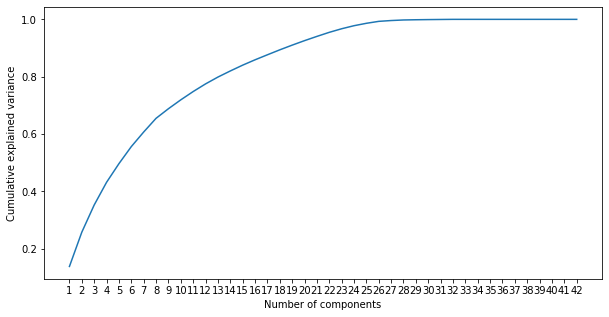

In [128]:
cumsum = np.cumsum(eig_values[idx]) / np.sum(eig_values[idx])
plt.figure(figsize=(10,5))
xint = range(1, len(cumsum) + 1)
plt.plot(xint, cumsum)
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.xticks(xint)

CALCULATING EIGEN SCORES FOR THE TOP 15 ELEMENTS WHOSE CUMULATIVE EXPLAINED VARIANCE IS THE LARGEST

In [129]:
eig_scores = np.dot(X_ex, sorted_eig_vectors[:, :15])
eig_scores

array([[ 1.34377394+0.j,  0.59620081+0.j,  0.03400236+0.j, ...,
        -0.98882125+0.j,  0.23415362+0.j,  0.11247637+0.j],
       [ 1.17109293+0.j,  0.0636123 +0.j,  0.0304017 +0.j, ...,
        -1.01234315+0.j,  0.01408141+0.j,  0.17879443+0.j],
       [ 0.97777839+0.j, -0.57903898+0.j,  0.02797441+0.j, ...,
        -0.93184397+0.j,  0.42538006+0.j,  0.12341431+0.j],
       ...,
       [-2.48369644+0.j,  3.3820882 +0.j, -0.01703099+0.j, ...,
         0.5775515 +0.j, -0.05236038+0.j,  1.03775282+0.j],
       [-2.66583377+0.j,  2.8181888 +0.j, -0.02109499+0.j, ...,
         0.60618089+0.j,  0.11941074+0.j,  1.01541239+0.j],
       [-2.66819905+0.j,  2.7312709 +0.j, -0.01844565+0.j, ...,
         0.65285555+0.j,  0.07988275+0.j,  1.06555058+0.j]])

We'll be using all the features since our training set large number of examples compared to our number of features. We're doing this in order to avoid a highly biased model.

# Building The Models

SPLITTING ON THE BASIS OF TIME

In [130]:
break_date = pd.Timestamp("2016-12-31 00:00:00")
train_data = df_final_new_4[df_final_new_4["date"] <= break_date]
test_data = df_final_new_4[df_final_new_4["date"] > break_date]

In [131]:
train_data

,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid_x_x,is_auto_renew,transaction_date,membership_expire_date,is_cancel,discount,is_discount,...,tot_user_in_a_city,tot_user_registered_via_a_reg_id,tot_no_of_unq_song,tot_money_paid_by_user,tot_incomplete_songs_heard_by_tot_complete_song,is_churn,num_25_avg,num_75_sum,num_50_sum,num_25_y
0,39,30,149,149,1,2015-09-30,2015-11-21,0,0,0,...,54521,162386,16,2392,0.000000,0,6.708333,45.0,63.0,24
1,39,30,149,149,1,2015-09-30,2015-11-21,0,0,0,...,54521,162386,16,2392,6.000000,0,6.708333,45.0,63.0,24
2,39,30,149,149,1,2015-09-30,2015-11-21,0,0,0,...,54521,162386,16,2392,9.029412,0,6.708333,45.0,63.0,24
3,39,30,149,149,1,2015-09-30,2015-11-21,0,0,0,...,54521,162386,16,2392,36.000000,0,6.708333,45.0,63.0,24
4,39,30,149,149,1,2015-09-30,2015-11-21,0,0,0,...,54521,162386,16,2392,23.026316,0,6.708333,45.0,63.0,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64375,36,30,180,180,0,2016-04-24,2016-05-24,0,0,0,...,4322,25105,6,1080,1.000000,0,0.733333,0.0,9.0,15
64376,36,30,180,180,0,2016-04-24,2016-05-24,0,0,0,...,4322,25105,6,1080,0.000000,0,0.733333,0.0,9.0,15
64377,36,30,180,180,0,2016-04-24,2016-05-24,0,0,0,...,4322,25105,6,1080,3.090909,0,0.733333,0.0,9.0,15
64378,36,30,180,180,0,2016-04-24,2016-05-24,0,0,0,...,4322,25105,6,1080,0.000000,0,0.733333,0.0,9.0,15


In [132]:
test_data

,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid_x_x,is_auto_renew,transaction_date,membership_expire_date,is_cancel,discount,is_discount,...,tot_user_in_a_city,tot_user_registered_via_a_reg_id,tot_no_of_unq_song,tot_money_paid_by_user,tot_incomplete_songs_heard_by_tot_complete_song,is_churn,num_25_avg,num_75_sum,num_50_sum,num_25_y
29,39,30,149,149,1,2015-12-02,2016-01-09,0,0,0,...,54521,162386,14,2086,17.034483,0,14.576923,44.0,57.0,26
43,39,30,149,149,1,2015-08-31,2015-10-28,0,0,0,...,54521,162386,28,4172,5.000000,0,8.500000,40.0,66.0,26
57,39,30,149,149,1,2016-12-31,2017-02-28,0,0,0,...,54521,162386,28,4172,5.000000,0,8.500000,40.0,66.0,26
83,39,30,149,149,1,2016-09-30,2016-11-19,0,0,0,...,54521,162386,13,1937,13.000000,0,8.555556,40.0,35.0,36
93,39,31,149,149,1,2015-01-31,2015-03-19,0,0,0,...,54521,162386,14,2086,3.000000,0,6.450000,17.0,33.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64367,38,30,149,149,0,2016-09-09,2016-10-09,0,0,0,...,4802,25105,6,894,5.050000,0,2.700000,6.0,9.0,10
64370,29,30,180,180,0,2016-10-07,2016-11-06,0,0,0,...,4802,25105,3,540,1.000000,0,11.250000,9.0,5.0,4
64372,39,30,149,149,1,2017-01-31,2017-03-20,0,0,0,...,4322,25105,2,298,2.000000,0,7.750000,4.0,10.0,4
64374,36,30,180,180,0,2017-01-28,2017-02-27,0,0,0,...,4322,25105,2,360,17.000000,1,16.666667,8.0,23.0,3


# X Label

MAKING THE NUMPY ARRAYS OF TRAIN AND TEST DATA SET

In [133]:
X_train=train_data.values
X_train

array([[39, 30, 149, ..., 45.0, 63.0, 24],
       [39, 30, 149, ..., 45.0, 63.0, 24],
       [39, 30, 149, ..., 45.0, 63.0, 24],
       ...,
       [36, 30, 180, ..., 0.0, 9.0, 15],
       [36, 30, 180, ..., 0.0, 9.0, 15],
       [36, 30, 180, ..., 0.0, 9.0, 15]], dtype=object)

In [134]:
X_train.shape

(59474, 49)

In [135]:
X_test=test_data.values
X_test

array([[39, 30, 149, ..., 44.0, 57.0, 26],
       [39, 30, 149, ..., 40.0, 66.0, 26],
       [39, 30, 149, ..., 40.0, 66.0, 26],
       ...,
       [39, 30, 149, ..., 4.0, 10.0, 4],
       [36, 30, 180, ..., 8.0, 23.0, 3],
       [36, 30, 180, ..., 0.0, 9.0, 15]], dtype=object)

In [136]:
X_test.shape

(4907, 49)

In [137]:
X_t1=np.array(train_data.select_dtypes(exclude={"datetime","category"}))
X_t1

array([[ 39.,  30., 149., ...,  45.,  63.,  24.],
       [ 39.,  30., 149., ...,  45.,  63.,  24.],
       [ 39.,  30., 149., ...,  45.,  63.,  24.],
       ...,
       [ 36.,  30., 180., ...,   0.,   9.,  15.],
       [ 36.,  30., 180., ...,   0.,   9.,  15.],
       [ 36.,  30., 180., ...,   0.,   9.,  15.]])

In [138]:
X_t1.shape

(59474, 42)

In [139]:
X_ts1=np.array(test_data.select_dtypes(exclude={"datetime","category"}))
X_ts1

array([[ 39.,  30., 149., ...,  44.,  57.,  26.],
       [ 39.,  30., 149., ...,  40.,  66.,  26.],
       [ 39.,  30., 149., ...,  40.,  66.,  26.],
       ...,
       [ 39.,  30., 149., ...,   4.,  10.,   4.],
       [ 36.,  30., 180., ...,   8.,  23.,   3.],
       [ 36.,  30., 180., ...,   0.,   9.,  15.]])

In [140]:
X_ts1.shape

(4907, 42)

SCALLING THE ARRAYS

In [141]:
X_t2 = StandardScaler().fit_transform(X_t1)
X_t2

array([[ 0.32946414, -0.08697491, -0.05996475, ...,  0.63186206,
         0.42686068, -0.10670616],
       [ 0.32946414, -0.08697491, -0.05996475, ...,  0.63186206,
         0.42686068, -0.10670616],
       [ 0.32946414, -0.08697491, -0.05996475, ...,  0.63186206,
         0.42686068, -0.10670616],
       ...,
       [-0.51109483, -0.08697491,  0.32059714, ..., -1.04098699,
        -0.76131914, -1.06251354],
       [-0.51109483, -0.08697491,  0.32059714, ..., -1.04098699,
        -0.76131914, -1.06251354],
       [-0.51109483, -0.08697491,  0.32059714, ..., -1.04098699,
        -0.76131914, -1.06251354]])

In [142]:
X_ts2 = StandardScaler().fit_transform(X_ts1)
X_ts2

array([[ 0.34018283, -0.08356554, -0.05403224, ...,  0.65117251,
         0.34338903,  0.24097849],
       [ 0.34018283, -0.08356554, -0.05403224, ...,  0.50027448,
         0.54591697,  0.24097849],
       [ 0.34018283, -0.08356554, -0.05403224, ...,  0.50027448,
         0.54591697,  0.24097849],
       ...,
       [ 0.34018283, -0.08356554, -0.05403224, ..., -0.85780779,
        -0.71425688, -1.965705  ],
       [-0.51527181, -0.08356554,  0.34218943, ..., -0.70690976,
        -0.42171653, -2.06600879],
       [-0.51527181, -0.08356554,  0.34218943, ..., -1.00870582,
        -0.73675999, -0.86236326]])

APPENDING THE CATEGORICAL VALUES BACK TO THE ARRAYS

In [143]:
X_t=np.append(X_t2,X_train[:,[4,7,9]],axis=1)
X_t

array([[0.3294641407409519, -0.08697491442424927, -0.05996475319965499,
        ..., 1, 0, 0],
       [0.3294641407409519, -0.08697491442424927, -0.05996475319965499,
        ..., 1, 0, 0],
       [0.3294641407409519, -0.08697491442424927, -0.05996475319965499,
        ..., 1, 0, 0],
       ...,
       [-0.5110948279907379, -0.08697491442424927, 0.3205971422517239,
        ..., 0, 0, 0],
       [-0.5110948279907379, -0.08697491442424927, 0.3205971422517239,
        ..., 0, 0, 0],
       [-0.5110948279907379, -0.08697491442424927, 0.3205971422517239,
        ..., 0, 0, 0]], dtype=object)

In [144]:
X_tst=np.append(X_ts2,X_test[:,[4,7,9]],axis=1)
X_tst

array([[0.34018282930602906, -0.08356554175448623, -0.05403223994306014,
        ..., 1, 0, 0],
       [0.34018282930602906, -0.08356554175448623, -0.05403223994306014,
        ..., 1, 0, 0],
       [0.34018282930602906, -0.08356554175448623, -0.05403223994306014,
        ..., 1, 0, 0],
       ...,
       [0.34018282930602906, -0.08356554175448623, -0.05403223994306014,
        ..., 1, 0, 0],
       [-0.5152718051685274, -0.08356554175448623, 0.3421894262456428,
        ..., 0, 0, 0],
       [-0.5152718051685274, -0.08356554175448623, 0.3421894262456428,
        ..., 0, 0, 0]], dtype=object)

REMOVING THE COLUMN THAT HAS THE VALUES FOR 'IS_CHURN' WHICH IS OUR TARGET VARIABLE

In [145]:
X_t=np.delete(X_t,44,axis=1)
X_t

array([[0.3294641407409519, -0.08697491442424927, -0.05996475319965499,
        ..., -0.10670616328624424, 1, 0],
       [0.3294641407409519, -0.08697491442424927, -0.05996475319965499,
        ..., -0.10670616328624424, 1, 0],
       [0.3294641407409519, -0.08697491442424927, -0.05996475319965499,
        ..., -0.10670616328624424, 1, 0],
       ...,
       [-0.5110948279907379, -0.08697491442424927, 0.3205971422517239,
        ..., -1.0625135364404337, 0, 0],
       [-0.5110948279907379, -0.08697491442424927, 0.3205971422517239,
        ..., -1.0625135364404337, 0, 0],
       [-0.5110948279907379, -0.08697491442424927, 0.3205971422517239,
        ..., -1.0625135364404337, 0, 0]], dtype=object)

In [146]:
X_tst=np.delete(X_tst,44,axis=1)
X_tst

array([[0.34018282930602906, -0.08356554175448623, -0.05403223994306014,
        ..., 0.24097848712859976, 1, 0],
       [0.34018282930602906, -0.08356554175448623, -0.05403223994306014,
        ..., 0.24097848712859976, 1, 0],
       [0.34018282930602906, -0.08356554175448623, -0.05403223994306014,
        ..., 0.24097848712859976, 1, 0],
       ...,
       [0.34018282930602906, -0.08356554175448623, -0.05403223994306014,
        ..., -1.9657049974316558, 1, 0],
       [-0.5152718051685274, -0.08356554175448623, 0.3421894262456428,
        ..., -2.0660087921843946, 0, 0],
       [-0.5152718051685274, -0.08356554175448623, 0.3421894262456428,
        ..., -0.862363255151528, 0, 0]], dtype=object)

In [147]:
X_t.shape

(59474, 44)

In [148]:
X_tst.shape

(4907, 44)

# Y Label

In [149]:
y_t=train_data["is_churn"].values
y_t

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [150]:
y_t.shape

(59474,)

In [151]:
y_tst=test_data["is_churn"].values
y_tst

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [152]:
y_tst.shape

(4907,)

# SVM

In [153]:
from sklearn.svm import SVC
SVM=SVC(kernel="linear")
SVM.fit(X_t,y_t)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [154]:
y_predict_SVM=SVM.predict(X_tst)
print(y_predict_SVM)

[0 0 0 ... 0 1 0]


In [218]:
from sklearn.metrics import log_loss
print('TEST:')
print('Log loss:', log_loss(y_tst,y_predict_SVM))

TEST:
Log loss: 9.992007221626415e-16


Text(0.5, 1.0, 'Confusion Matrix for SVM\n')

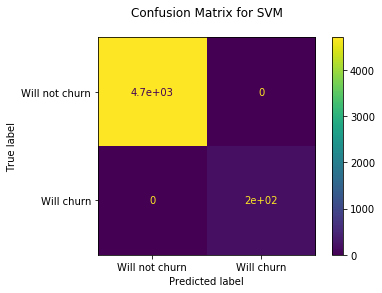

In [157]:
from sklearn.metrics import plot_confusion_matrix
class_name = ['Will not churn', 'Will churn']
plot_confusion_matrix(SVM, X_tst, y_tst, display_labels=class_name)
plt.title('Confusion Matrix for SVM\n')

# KNN

In [158]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(X_t,y_t)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [159]:
y_predict_knn=knn.predict(X_tst)
print(y_predict_knn)

[0 0 0 ... 0 1 0]


In [217]:
print("TEST:")
print('Log loss:', log_loss(y_tst,y_predict_knn))

TEST:
Log loss: 0.04927072238931723


Text(0.5, 1.0, 'Confusion Matrix for KNeighbors Classifier\n')

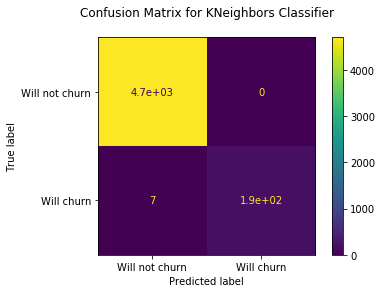

In [162]:
plot_confusion_matrix(knn, X_tst, y_tst, display_labels=class_name)
plt.title('Confusion Matrix for KNeighbors Classifier\n')

# Light GBM

In [183]:
import lightgbm as lgb
from sklearn.model_selection import (GridSearchCV,StratifiedKFold)
params = {
     'application': 'binary', 
    'boosting': 'gbdt',
    'num_iterations': 200, 
    'learning_rate': 0.05,
    'num_leaves': 30,
    'device': 'gpu', 
    'max_depth': 100, 
    'max_bin': 255,
    'lambda_l1': 5,
    'lambda_l2': 10,
    'metric' : 'binary_logloss',
    'subsample_for_bin': 200,
    'colsample_bytree': 0.8,
}
mdl = lgb.LGBMClassifier(boosting_type= 'gbdt', 
          objective = 'binary', 
          n_jobs = 3, 
          silent = True,
          max_depth = params['max_depth'],
          max_bin = params['max_bin'], 
          subsample_for_bin = params['subsample_for_bin'])
mdl.get_params().keys()

dict_keys(['boosting_type', 'class_weight', 'colsample_bytree', 'importance_type', 'learning_rate', 'max_depth', 'min_child_samples', 'min_child_weight', 'min_split_gain', 'n_estimators', 'n_jobs', 'num_leaves', 'objective', 'random_state', 'reg_alpha', 'reg_lambda', 'silent', 'subsample', 'subsample_for_bin', 'subsample_freq', 'max_bin'])

In [184]:
gridParams = {
    'learning_rate': [0.005,0.01,0.03,0.05,1,1.3],
    'n_estimators': [16,24,32],
    'num_leaves': [16,24,30,32],
    'boosting_type' : ['gbdt', 'dart'],
    'objective' : ['binary'],
    'max_bin':[255, 510],
    'random_state' : [500],
    'colsample_bytree' : [0.64, 0.65, 0.66],
    'reg_alpha' : [1,1.2],
    'reg_lambda' : [1,1.2,1.4]
    }
grid = GridSearchCV(mdl, gridParams, verbose=1, cv=StratifiedKFold(shuffle=True,n_splits=3),n_jobs=-1)
grid.fit(X_t, y_t)
print(grid.best_params_,grid.best_score_)

Fitting 3 folds for each of 5184 candidates, totalling 15552 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed: 18.2min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed: 23.6min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed: 29.1min
[Parallel(n_jobs=-1)]: Done 4976 tasks      | elapsed: 35.7min
[Parallel(n_jobs=-1)]: Done 6026 tasks      | elapsed: 43.1min
[Parallel(n_jobs=-1)]: Done 7176 tasks      | elapsed: 50.4min
[Parallel(n_jobs=-1)]: Done 8426 tasks      | elapsed: 58.2min
[Parallel(n_jobs=-1)]: Done 9776 tasks      | elapsed: 66.5min
[Parallel(n_jobs=-1)]: Done 11226 tasks      

{'boosting_type': 'gbdt', 'colsample_bytree': 0.64, 'learning_rate': 1, 'max_bin': 255, 'n_estimators': 16, 'num_leaves': 16, 'objective': 'binary', 'random_state': 500, 'reg_alpha': 1, 'reg_lambda': 1} 1.0


In [215]:
grid.best_score_

1.0

In [198]:
training_data = lgb.Dataset(X_t, label=y_t)
testing_data = lgb.Dataset(X_tst, label=y_tst)

In [199]:
parameters ={'boosting_type': 'gbdt', 
             'colsample_bytree': 0.64, 
             'learning_rate': 1, 
             'max_bin': 255, 
             'n_estimators': 16, 
             'num_leaves': 16,
             'objective': 'binary', 
             'random_state': 500, 
             'reg_alpha': 1, 
             'reg_lambda': 1   
}
model = lgb.train(parameters,
                  training_data,
                  valid_sets=testing_data,
                  num_boost_round=5000,
                  early_stopping_rounds=100)

[1]	valid_0's binary_logloss: 0.201185
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.0543535
[3]	valid_0's binary_logloss: 0.0389001
[4]	valid_0's binary_logloss: 0.0266497
[5]	valid_0's binary_logloss: 0.0214102
[6]	valid_0's binary_logloss: 0.0174738
[7]	valid_0's binary_logloss: 0.0144722
[8]	valid_0's binary_logloss: 0.0121034
[9]	valid_0's binary_logloss: 0.0103861
[10]	valid_0's binary_logloss: 0.00932663
[11]	valid_0's binary_logloss: 0.00875472
[12]	valid_0's binary_logloss: 0.00875472
[13]	valid_0's binary_logloss: 0.00846351
[14]	valid_0's binary_logloss: 0.00831757
[15]	valid_0's binary_logloss: 0.00824463
[16]	valid_0's binary_logloss: 0.00824463
Did not meet early stopping. Best iteration is:
[15]	valid_0's binary_logloss: 0.00824463


In [204]:
y_predict_lgbm = model.predict(X_tst)

In [205]:
y_predict_lgbm

array([8.42245191e-06, 8.42245191e-06, 8.42245191e-06, ...,
       8.48635851e-06, 9.98698612e-01, 1.03835196e-04])

In [207]:
y_predict_lgbm.shape

(4907,)